# EDE Case Study 

##### This Case Study is done by  <font color='blue'> Soukhya Shivanand halasagi </font> and <font color='blue'> Mukesh Rana </font>.


### Provlem Statement
- This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 
- This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

### Index
 ####  1. Import
    a. Importing Libraries
    b. Importing Dataset
 ####  2.  Data Inspection  
    a. inspecting dataset

 ####  3. Data Cleansing (On Application Dataset)
    a. Handeling Missing values
    
 #### 4. Feature Engineering
 #### 5. Data Validation
    a. Visualization of Outliers
    b. Binning Continous Variable
 #### 6. Data Analysis
    a. Checking for Imbalance Percentage
    b. Dividing dataset
    c. Univariate analysis
        A. Univariate analysis with Continous data
        B. Univariate analysis with Categorical data
    d. Bivariate Analysis
    e. Multivairate analysis
 #### 7. Previous Application Dataset
    a. Reading Daataset
    b. Dataset inspection & Validation
    c. Data Cleaning
    d. Merging of Current &bPrevious dataset
    e. Data Analysis on Derived Dataset
 #### 8. Conclusion

 
 -----------------------------------------------------------------------------------------------------------------

### 1. Import
###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# code to display all the Rows and Columns present in dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# code to ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

###### Importing Dataset 

In [4]:
# Importing Data using variable name 'Application' for application dataset and 'Pre_application' for Precious_application dataset 
application = pd.read_csv('application_data.csv')
pre_application = pd.read_csv('previous_application.csv')

 ###  2.  Data Inspection  

##### Inspecting Data set

In [5]:
# Displaying few top rows/records of application data
application.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Displaying few bottom rows/records of application data
application.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [7]:
# Displaying few top rows/records of pre_application data
pre_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Displaying few bottom rows/records of application data
pre_application.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [9]:
# Finding size and shape of the data
print('shape of application dataset :', application.shape)
print('Shape of previous application :', pre_application.shape)

shape of application dataset : (307511, 122)
Shape of previous application : (1670214, 37)


In [10]:
# Checking the column-wise info of the dataframe
print('For new applications : \n')
print(application.info(verbose=True)) # We are using verbose=True here as Dataframe has so many columns
print('\n\n\nFor previous applications : \n')
print(pre_application.info())

For new applications : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18

In [11]:
# Brief Statistical analysis of numerical columns of application dataset
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
# Brief Statistical analysis for pre_application dataset

pre_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [13]:
# Findng the number of numerical & categorical columns in both dataset
print('Number of numerical columns present in application data is : ', 
      application.describe().columns.size)
print('Number of Categorical columns present in application data is : ', 
      application.shape[1] - application.describe().columns.size)
print('Number of numerical columns present in pre_application data is : ',
     pre_application.describe().columns.size)
print('Number of numerical columns present in application data is : ',
     pre_application.shape[1] - pre_application.describe().columns.size)


Number of numerical columns present in application data is :  106
Number of Categorical columns present in application data is :  16
Number of numerical columns present in pre_application data is :  21
Number of numerical columns present in application data is :  16


### 3. Data Cleansing (on Application dataset)
##### Handling MIssing Values

In [14]:
# Checking for NULL vakues in application dataset
application.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
# Checking for Percentage NULL vakues in application dataset
per_Null_value = application.isnull().sum() * 100 / len(application)
print(round(per_Null_value, 2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [16]:
## Checking the number of columns in which the percentage of missing values is greater than 50%.
## Storing it in a list.

missing_col=application.columns[(application.isnull().sum() * 100 / len(application)) >= 50]
missing_col=list(missing_col)
len(missing_col)

41

In [17]:
# Showing all columns having missing values more than 50%
missing_col

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

All the columns showing missing values more than 50% seems not much important. So We can ignore them and can remove from our dataset.

In [18]:
# Dropping the columns listed above
application.drop(missing_col, axis=1, inplace=True)

# Now we are left with Columns with missing values less than 50%, and those are .......
round(application.isnull().sum() * 100 / len(application),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [19]:
# Printing 
application.shape

(307511, 81)

Now we are left with only 81 collumns

##### Checking the number of columns in which the percentage of missing values is less than 15%.

In [20]:
##Checking the data set for which the NULL value is more than 40% and handing it.

missing_col_2 = application.columns[(application.isnull().sum() * 100 / len(application)) >= 40]
missing_col_2

Index(['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

The above columns seems not much important, so we can remove these as well

In [21]:
# Dropping the columns listed above
application.drop(missing_col_2, axis=1, inplace=True)

# dataset shape
application.shape

(307511, 73)

- Now we are left 73 columns
- In this data set 'Missing value Treatment' is not so much important as dataset has so many observations/records.
- So, for this, 'Missing value Treatment' can be ignored.

### 4. Feature Engineering

In [22]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

##### Let's Understand Different types of Forms and their importance
- Form 2 : is for Individuals and HUF receiving income other than income from “Profits and Gains from Business or Profession”. Thus persons having income from following sources are eligible to file Form ITR 2: Salary/pension.
- Form 3 : is a return of deposits that companies must file to furnish information about deposits and/or outstanding receipt of loan or money other than deposits.
- Form 4 : is the Income Tax Return form for those taxpayers, who have opted for the presumptive income scheme as per Section 44AD, Section 44ADA and Section 44AE of the Income Tax Act.
- Form 5 : is filled by an employer every month mentioning the details of new joinees (of last month) who are eligible for EPF services.
- Form 6 : is the Income Tax Return form which is used by the companies to e-file Income Tax Return.
-  ITR-7 is filed when persons including companies fall under section 139(4A) or section 139 (4B) or section 139 (4C) or section 139 4(D). 
- Form 8 : is a Form required to be filed with ROC with in 30 days from the creation of charge or modification of earlier charge filed. It will be filed by the company or by the bank or other arty on behalf of the company.
- Form-9 : is a document issued by the Gram Panchayat for non-agricultural properties in its jurisdiction as per Karnataka Panchayat Raj (Grama Panchayat Budgeting and Accounting) Rules 2006, Amendment Rules 2013 mentioned under Rule 28.
- Form 10 : The default form for registering a class of securities under Sections 12(b) or 12(g) of the Exchange Act. Form 10 of the Exchange Act requires financial statements and a wider range of company information than would be included in a Form 8-A.
- Form 11 : The EPF form 11 is a self-declaration form that every employee needs to fill and at the time of joining a new organization that is registered under the EPF Scheme of 1952. This form contains information on the EPF history of the employee.
- From 12 :This Income Tax Return (Form 12) is to be completed by a person whose main source of income is from a PAYE employment or pension or a non-proprietary company director who pays all his / her income tax under the PAYE system.
- From 13 : An application for Nil/ Lower deduction of TDS is required to be filed in Form 13 to the Income Tax Officer, and the tax officer on being satisfied that lower deduction of TDS is justified shall issue a certificate for the same under Section 197.
- Form 14 : Form of application for family pension on death of a Government servant/pensioner/family pensioner.
- Form 15g :is a declaration fills by the bank fixed deposit holders whose ages are less than 60 years and are not HUF.
- Form 16 : can be a crucial document for the following reasons: It works as a proof that your employer has deducted tax from your salary and deposited it with the government. It helps in the income tax returns efiling process. It is usually requested by banks and financial institutions when you approach them for loans.
- Form 17 : is the external form required by private students who wish to appear for the secondary school certificate (SSC, Class X) and higher secondary certificate (HSC, Class XII) examinations in February and March 2019 respectively. 
- Form 19 : has to be filled when a member wants to go for a final settlement of his/her PF account. It is only applicable to employees who do not have Universal Account Number (UAN). PF Form no 19 can be filed without a UAN, and the member will only have to mention his/her PF account number.
- FORM NO. 20. (To be made in duplicate if the vehicle is held under an agreement of Hire-Purchase / Lease / Hypothcation and duplicate. copy with the endorsement of the Registering Authority to be returned to the Financier simultaneously on Registration of. Motor Vehicle)
- From 21 : To be issued by manufacturer or dealer or registered E-riskshaw or E-cart Association (in case of E-rickshaw or E-cart) or officer of Defence Department (in case of military auctioned vehicles) for presentation along with the application for registration of a motor vehicle. 

From above informations we can say that these columns are of not much importace so we can remove those as well..

In [23]:
#  Removing Columns from dataset
col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
application.drop(col, axis=1, inplace=True)

# Printing the shape of the remaining dataset
application.shape

(307511, 53)

In [24]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [25]:
# Creating a subset of the data with Flags of contacts.
contact_details = application[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
                               'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']]
contact_details.head(1)

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
0,1,1,0,1,1,0


In [26]:
# creating a new columns which has the sum of those columns
application['Flag_Contacts'] = contact_details.sum(axis=1)

# Removing those columns now
application.drop(contact_details, axis=1, inplace=True)

# Printing remaining dataset
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Flag_Contacts
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [27]:
# After this much, Still we are left with few columns which are not of for analysis
# Dropping unwanted Columns in the dataset which is not required for analysis.

unwated_cols=['HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE', 
              'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
              'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
              'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

application.drop(unwated_cols, axis=1, inplace=True)

In [28]:
## Final list of Columns used for the data analysis.
print(application.shape)
print('\n',application.columns)

(307511, 34)

 Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'Flag_Contacts'],
      dtype='object')


### 5 Data validation

In [29]:
# Checking for uf there is any null values
application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

In [30]:
# As we  still have Null values, Let's find their percentage in the dataset and round the percentage to 2 values
round((application.isnull().sum()/len(application))*100, 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
L

OCCUPATION_TYPE is a essential for the further analysis, so we should analyse the data in their raw form only.

In [31]:
# Cheking the number of unique values in each column
application.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_N

In [32]:
# Creating a new Collumn to have the age of a person by using DAYS_BIRTH column.

application['age']=(application['DAYS_BIRTH']/365).abs()

## Age of each client.
application['age'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: age, dtype: float64

In [33]:
application.drop('DAYS_BIRTH', axis=1, inplace=True)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Flag_Contacts,age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,-1134.0,4,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,0,0,0,School,-828.0,4,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,-815.0,5,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,-617.0,3,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,-1106.0,3,54.608219


#### Visualization of  Outliers

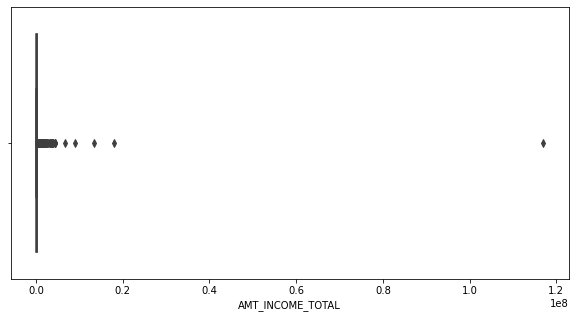

In [34]:
# Checking outlier for AMT_CREDIT column.

plt.figure(figsize=[10,5])
sns.boxplot(data=application,x='AMT_INCOME_TOTAL')
plt.show()

It seem that thsi columns has Huge outliers, Let's find it

In [35]:
# Sorting the AMT_INCOME_TOTAL in descending order and printing in lacs format
application['income'] = application.AMT_INCOME_TOTAL/100000

# Dropping the AMT_INCOME_TOTAL as we are done with this 
application.drop('AMT_INCOME_TOTAL', axis=1, inplace=True)

# Sorting data as per Income
application.sort_values(by='income', ascending=False).head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Flag_Contacts,age,income
12840,114967,1,Cash loans,F,N,Y,1,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-922,-6762.0,-3643,Laborers,3.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.0,3,34.561644,1170.000000
203693,336147,0,Cash loans,M,Y,Y,2,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-4961,-3338.0,-4728,NaN,4.0,2,2,0,0,0,0,0,0,Business Entity Type 3,-1133.0,3,43.024658,180.000900
246858,385674,0,Cash loans,M,Y,Y,0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-280,-3953.0,-4972,NaN,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,-13.0,4,37.126027,135.000000
77768,190160,0,Cash loans,F,Y,N,0,1431531.0,132601.5,1377000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.010147,-8476,-7276.0,-1656,Managers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 1,-3.0,3,45.000000,90.000000
131127,252084,0,Cash loans,M,Y,N,0,790830.0,52978.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.009549,-443,-7414.0,-2886,Laborers,2.0,2,2,0,1,1,0,1,1,Transport: type 4,-695.0,5,52.989041,67.500000
103006,219563,0,Revolving loans,M,Y,Y,0,2250000.0,225000.0,2250000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.007330,-378,-4919.0,-3441,Managers,1.0,2,2,0,1,1,0,0,0,Construction,-529.0,4,29.528767,45.000000
204564,337151,0,Cash loans,M,N,N,0,450000.0,47749.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.009334,-8472,-1179.0,-1997,Managers,1.0,2,2,0,0,0,0,0,0,Military,-3206.0,4,50.578082,45.000000
187833,317748,0,Cash loans,M,N,N,0,835380.0,42651.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006008,-3331,-8877.0,-2104,Laborers,2.0,2,2,1,1,0,1,1,0,Construction,-613.0,4,51.273973,45.000000
287463,432980,0,Cash loans,M,Y,Y,0,1755000.0,61132.5,1755000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.010032,-3618,-9447.0,-2315,Managers,2.0,2,2,0,0,0,0,0,0,Self-employed,-284.0,4,51.463014,45.000000
181698,310601,0,Cash loans,M,Y,Y,1,675000.0,66217.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,With parents,0.032561,-3163,-10078.0,-683,Managers,3.0,1,1,0,0,0,0,0,0,Trade: type 2,-902.0,5,28.964384,39.500595


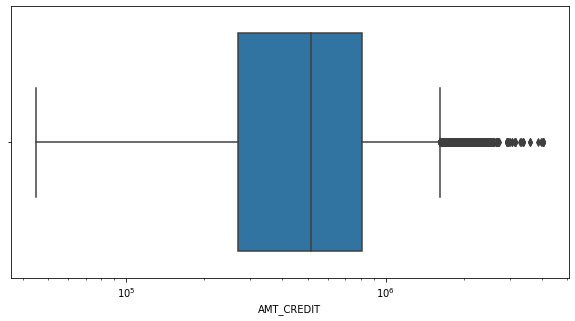

In [36]:
# Checking outlier for AMT_CREDIT column.

plt.figure(figsize=[10,5])
plt.xscale('log')
sns.boxplot(data=application,x='AMT_CREDIT')
plt.show()

It seems good! 

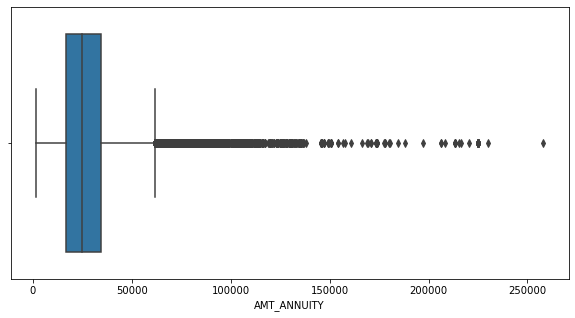

In [37]:
# Checking outlier for AMT_ANNUITY column.

plt.figure(figsize=[10,5])
sns.boxplot(data=application,x='AMT_ANNUITY')
plt.show()

We see some Outliers in AMT_ANNUITY column and majority lies between 15000 to 35000.

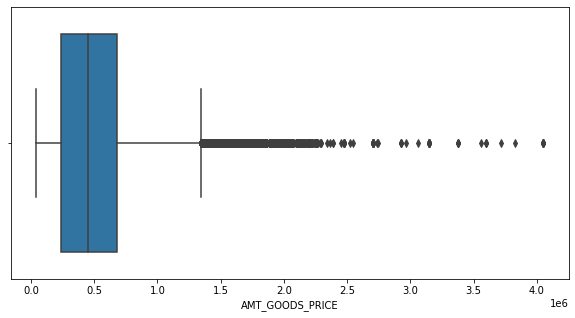

In [38]:
# Checking outlier for AMT_GOODS_PRICE column.

plt.figure(figsize=[10,5])
sns.boxplot(data=application,x='AMT_GOODS_PRICE')
plt.show()

We see some Outliers in AMT_GOOD_PRICE column and majority lies between 2.5lakhs to 7lakhs

#### Binning Continous variables

##### The following columns are of continous values hence we are creating bins for each of these columns for better analysis. 
-  ##### income
-  ##### AMT_CREDIT
-  ##### AMT_ANNUITY
-  ##### AMT_GOODS_PRICE
-  ##### AGE 

In [39]:
application['bin_income'] = pd.cut(application.income, 
                            bins=np.linspace(0, 1200, 25))

In [40]:
# Creating bins for AMT_CREDIT_RANGE column.
bins = [0,300000,600000,900000,1200000,1500000,1800000,2100000,2400000,2700000,3000000,3300000,3600000,3900000,1000000000]
slots = ['0-300000', '300000-600000','600000-900000', '900000-1200000', '1200000-1500000', '1500000-1800000','1800000-2100000',
        '2100000-2400000','2400000-2700000','2700000-3000000','3000000-3300000','3300000-3600000','3600000-3900000','3900000-above']

application['AMT_CREDIT_RANGE']=pd.cut(application['AMT_CREDIT'],bins=bins,labels=slots)

In [41]:
# Creating bins for AMT_ANNUITY column.

bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000,260000]
slots = ['0-20000', '20000-40000','40000-60000', '60000-80000', '80000-100000', '100000-120000','120000-140000',
        '140000-160000','160000-180000','180000-200000','200000-220000','220000-240000','240000 and above']

application['AMT_ANNUITY_RANGE']=pd.cut(application['AMT_ANNUITY'],bins=bins,labels=slots)

In [42]:
# Creating bins for AMT_GOODS_PRICE column.

bins = [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000,2000000,5000000]
slots = ['0-200000', '200000-400000','400000-600000', '600000-800000', '800000-1000000', '1000000-1200000','1200000-1400000',
        '1400000-1600000','1600000-1800000','18000000-2000000','2000000 and above']

application['AMT_GOODS_PRICE_RANGE']=pd.cut(application['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [43]:
# Creating  bins for age column.

bins=[20,25,30,35,40,45,50,55,60,65,70]
slots=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-above']

application['AGE_Group']=pd.cut(application['age'],bins=bins,labels=slots)

### 6. Data Analysis

##### Check for Imbalance percentage

In [44]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'Flag_Contacts', 'age',
       'income', 'bin_income', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE',
       'AMT_GOODS_PRICE_RANGE', 'AGE_Group'],
      dtype='object')

In [45]:
(application.TARGET.value_counts(normalize=True))* 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

As the data is divided into 92% and 8%. It's imbalanace data

##### Divide the data

In [46]:
# Spliting the data set into 2 based on the target column(0 & 1).
target0 = application.loc[application["TARGET"]==0]
target1 = application.loc[application["TARGET"]==1]

In [47]:
print("Size of Dataset 1 with target 0: "+format(len(target0)))
print("Size of Dataset 2 with target 1: "+format(len(target1)))

Size of Dataset 1 with target 0: 282686
Size of Dataset 2 with target 1: 24825


####  Univarient Analysis.

#### Performing Univariant Analysis of Continous columns based on Target 0 and 1.

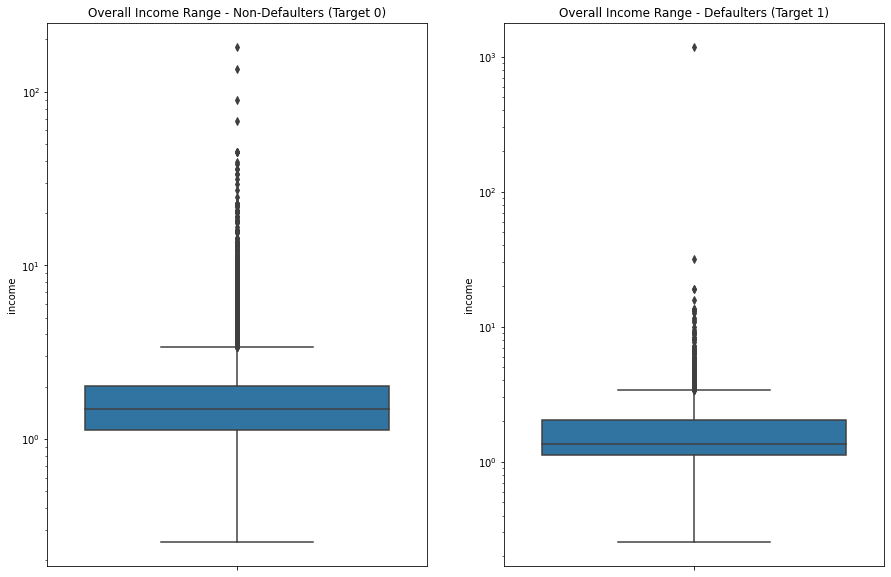

In [48]:
# Identifing data distribution for AMT_INCOME_TOTAL column.

plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Overall Income Range - Non-Defaulters (Target 0)")
sns.boxplot(data = target0, y='income')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Overall Income Range - Defaulters (Target 1)")
sns.boxplot(data = target1, y='income')
plt.show()

- #### We see that values are more spreadout in Non-Defaulter list (Target 0).
- #### We see comparatively less outliers in Target 1 than Target 0.

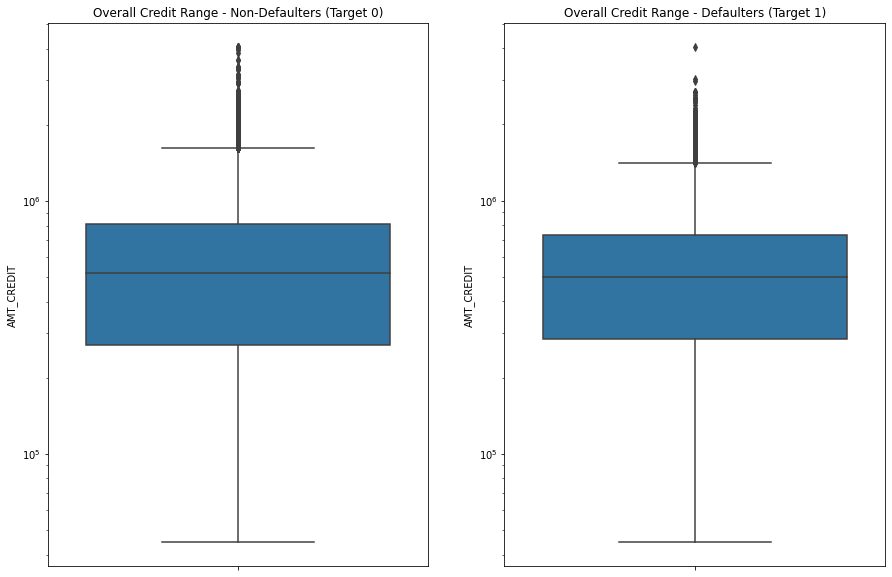

In [49]:
# Identifing data distribution for AMT_CREDIT column.

plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Overall Credit Range - Non-Defaulters (Target 0)")
sns.boxplot(data = target0, y='AMT_CREDIT')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Overall Credit Range - Defaulters (Target 1)")
sns.boxplot(data = target1, y='AMT_CREDIT')
plt.show()

- #### We see that values are more spreadout in Non-Defaulter list (Target 0).
- #### We see comparatively less outliers in Target 1 than Target 0.

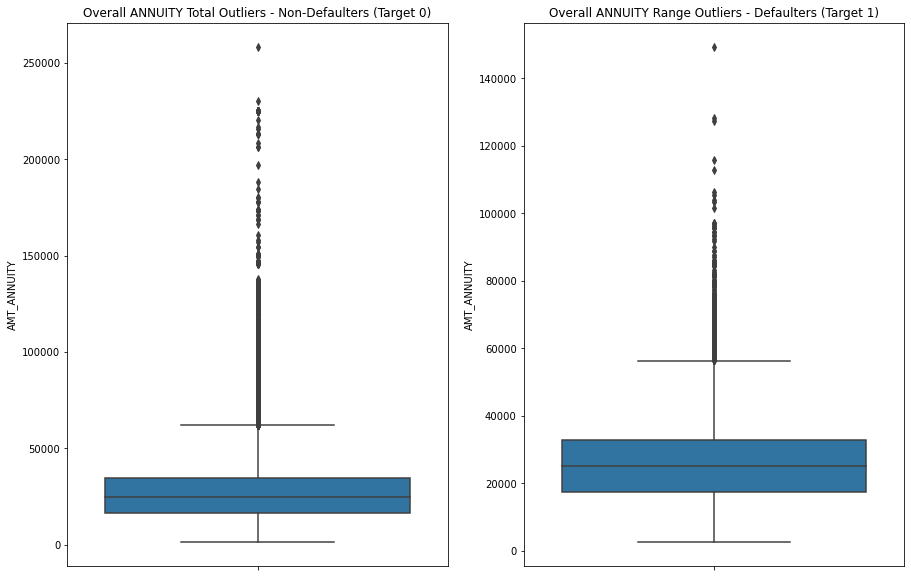

In [50]:
# Identifing data distribution for AMT_ANNUITY column.

plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title("Overall ANNUITY Total Outliers - Non-Defaulters (Target 0)")
sns.boxplot(data = target0, y='AMT_ANNUITY')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title("Overall ANNUITY Range Outliers - Defaulters (Target 1)")
sns.boxplot(data = target1, y='AMT_ANNUITY')
plt.show()

- #### We see that annuity values are more spreadout in Non-Defaulter list (Target 0).
- #### We see comparatively less outliers in Target 1 than Target 0.

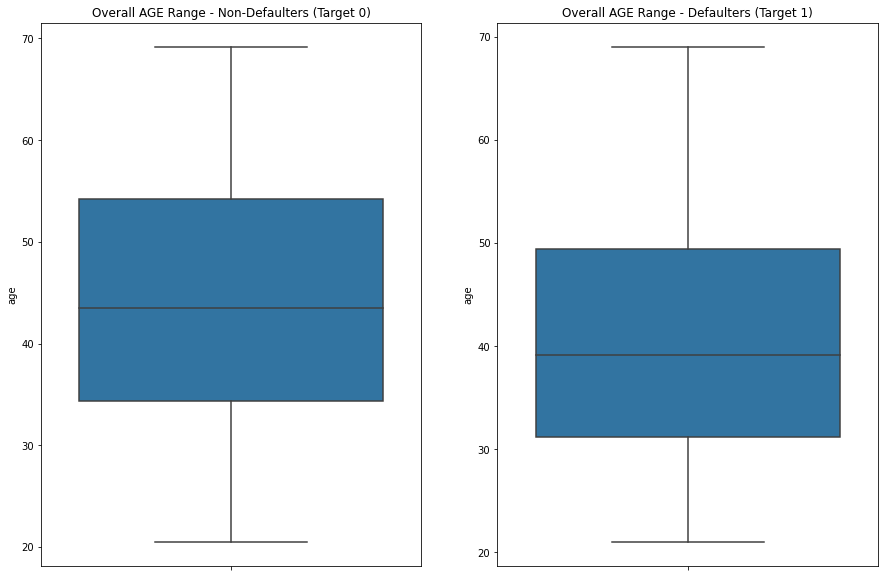

In [51]:
# Identifing data distribution for AGE column.

plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title("Overall AGE Range - Non-Defaulters (Target 0)")
sns.boxplot(data = target0, y='age')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title("Overall AGE Range - Defaulters (Target 1)")
sns.boxplot(data = target1, y='age')
plt.show()

- #### We don't see any outliers.
- #### We see uniform distribution among loan applicants wherein majority of them lies between 35 to 45 age group.
- #### The average age of Non-Defaulter is around 45 and average age of Defaulters are below 40 year. 
- #### So we can say that applicant of age less than 40 are prone to Defalt

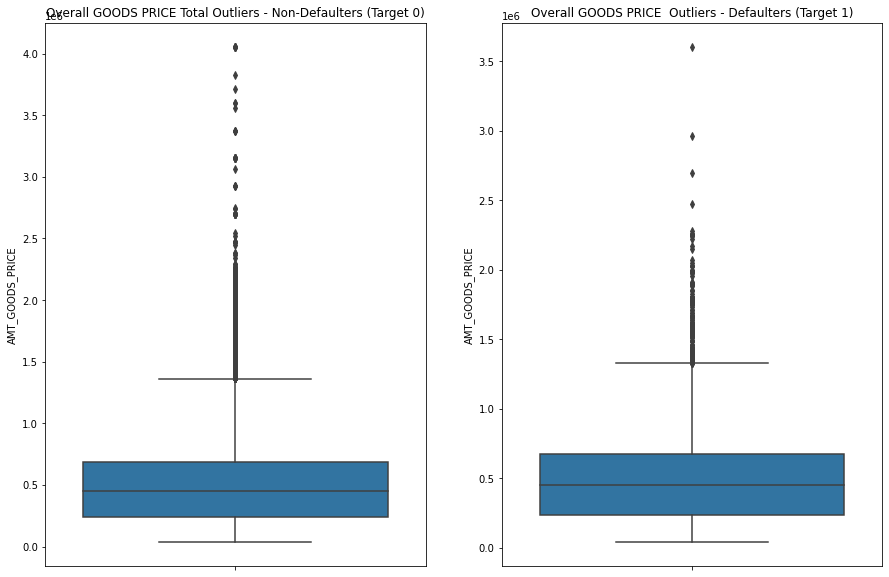

In [52]:
# Identifing data distribution for AMT_GOODS_PRICE column.

plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title("Overall GOODS PRICE Total Outliers - Non-Defaulters (Target 0)")
sns.boxplot(data = target0, y='AMT_GOODS_PRICE')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title("Overall GOODS PRICE  Outliers - Defaulters (Target 1)")
sns.boxplot(data = target1, y='AMT_GOODS_PRICE')
plt.show()

- #### We see that values are more spreadout in Non-Defaulter list (Target 0).
- #### We see comparatively less outliers in Target 1 than Target 0.

#### Performing Univariant Analysis of Categorial columns based on Target 0 and 1.

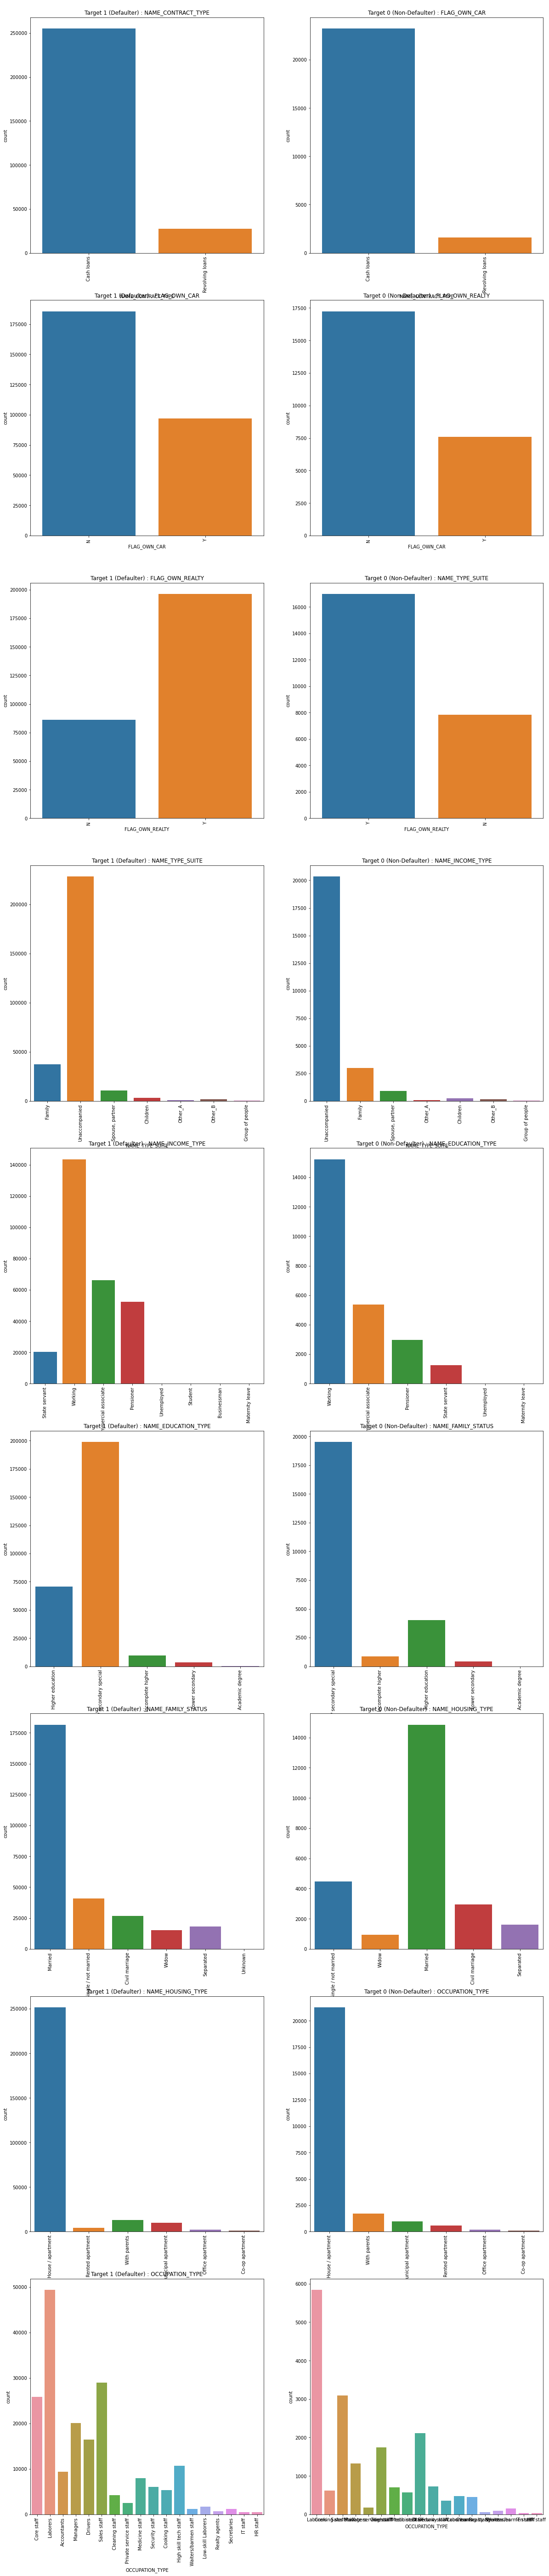

In [53]:
application.head()

# Identifying pattern for different Catergorial caloumns based on Target 0 and 1.

columns=['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
         'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

plt.figure(figsize = (20, 100))
for i in enumerate(columns):
    plt.title("Target 0 (Non-Defaulter) : "+i[1])
    plt.xticks(rotation=90)
    plt.subplot(len(columns), 2, (i[0]+1)*2-1)
    sns.countplot(x = i[1],data = target0)
    plt.title("\nTarget 1 (Defaulter) : "+i[1])
    plt.xticks(rotation=90)
    plt.subplot(len(columns), 2, (i[0]+1)*2)
    sns.countplot(x = i[1], data = target1)

- #### From the above plots we see a detailed distribution of several entities and how they vary based on Target 0 (Deafulters) anf Target 1 (Non-Defaulters)

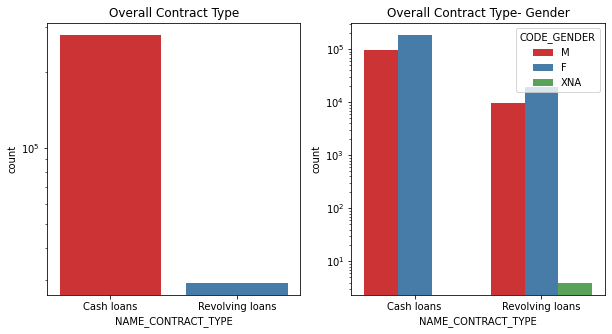

In [54]:
# Identifing the pattern in Contract Type column.

plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
plt.subplot(1,2,1)
plt.yscale('log')
plt.title("Overall Contract Type")
sns.countplot(data = application, x='NAME_CONTRACT_TYPE', order=application['NAME_CONTRACT_TYPE'].value_counts().index,
              palette=sns.color_palette('Set1'))
plt.subplot(1,2,2)
plt.yscale('log')
plt.title("Overall Contract Type- Gender")
sns.countplot(data = application, x='NAME_CONTRACT_TYPE', order=application['NAME_CONTRACT_TYPE'].value_counts().index,
              hue ='CODE_GENDER',palette=sns.color_palette('Set1'))
plt.show()

- #### We see that majority of the Contract_type tends to `Cash Loans` than `Revolving Loans`. 
- #### From the Subplot 2 we also see that most Men won't prefer Revolving loans.

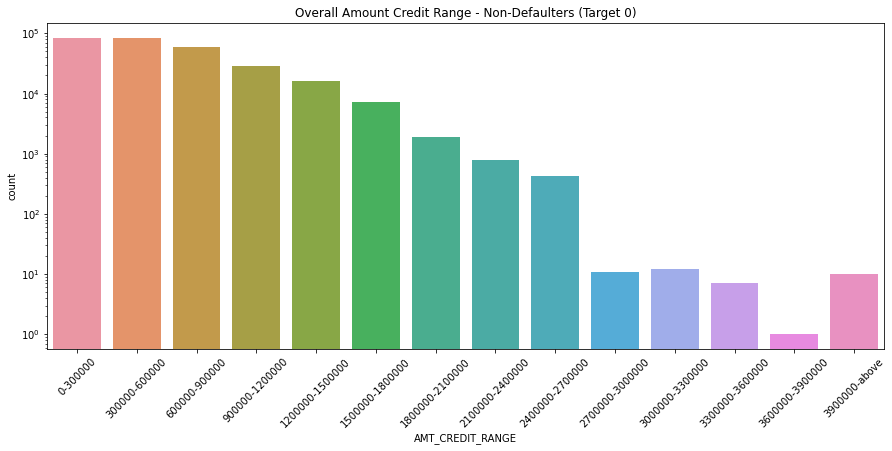

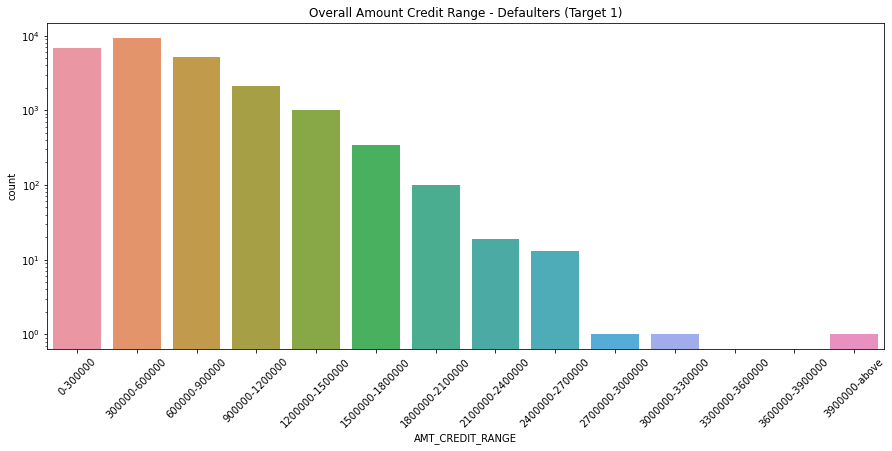

In [55]:
# Identifing data distribution for AMT_CREDIT_RANGE column.

plt.figure(figsize=[15,6])
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Overall Amount Credit Range - Non-Defaulters (Target 0)")
sns.countplot(data = target0, x='AMT_CREDIT_RANGE')
plt.show()
plt.figure(figsize=[15,6])
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Overall Amount Credit Range - Defaulters (Target 1)")
sns.countplot(data = target1, x='AMT_CREDIT_RANGE')
plt.show()

- #### Majority of the applicants apply for loan amount less than 10 lakhs. 
- #### Very less percentage of applicants apply for loans greater than 36 lakhs.

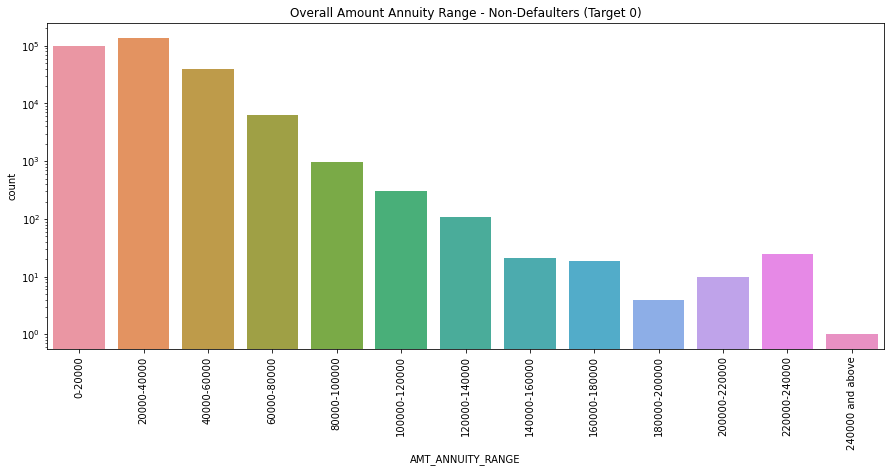

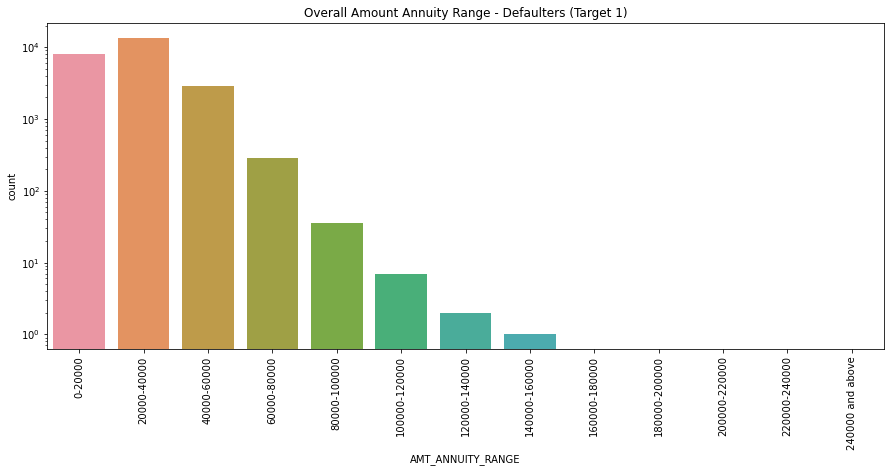

In [56]:
# Identifing data distribution for AMT_ANNUITY_RANGE column.

plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Overall Amount Annuity Range - Non-Defaulters (Target 0)")
sns.countplot(data = target0, x='AMT_ANNUITY_RANGE')
plt.show()
plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Overall Amount Annuity Range - Defaulters (Target 1)")
sns.countplot(data = target1, x='AMT_ANNUITY_RANGE')
plt.show()

- #### There are hardly any defaulters (Target 1) in who has Annuty greater than 140000. 
- #### And we see majority of non-defaulters (Target 0) have annuinty amount under 80000.

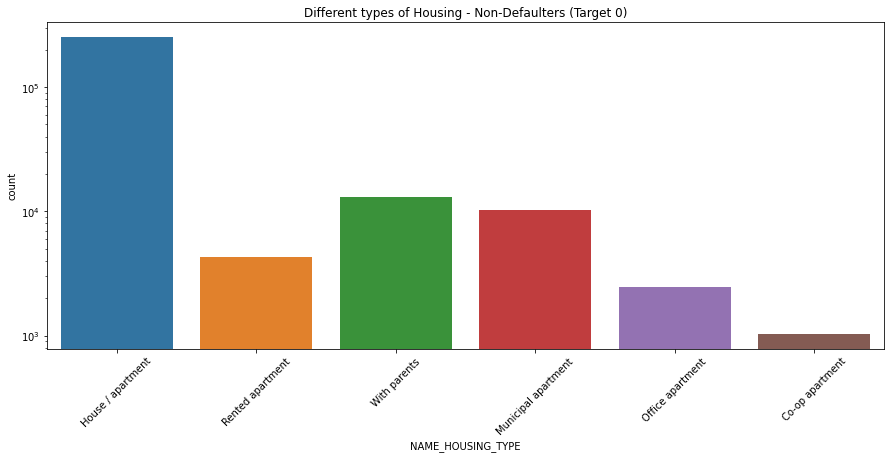

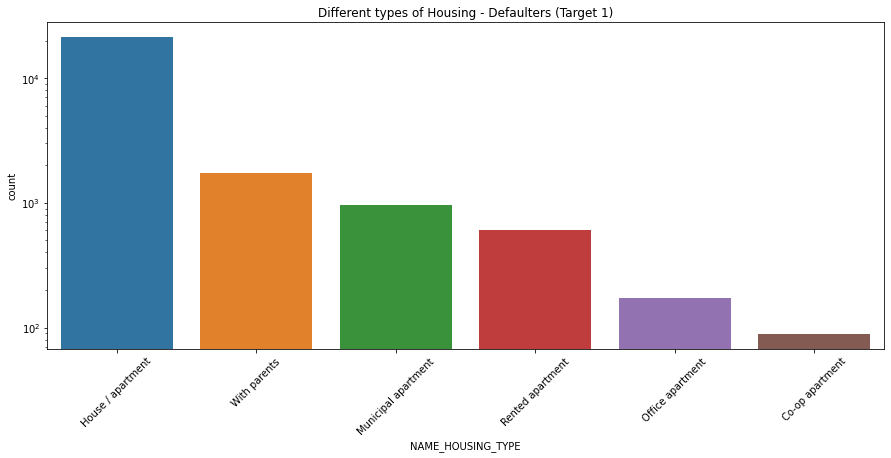

In [57]:
# Identifing data distribution for NAME_HOUSING_TYPE column.

plt.figure(figsize=[15,6])
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Different types of Housing - Non-Defaulters (Target 0)")
sns.countplot(data = target0, x='NAME_HOUSING_TYPE')
plt.show()
plt.figure(figsize=[15,6])
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Different types of Housing - Defaulters (Target 1)")
sns.countplot(data = target1, x='NAME_HOUSING_TYPE')
plt.show()

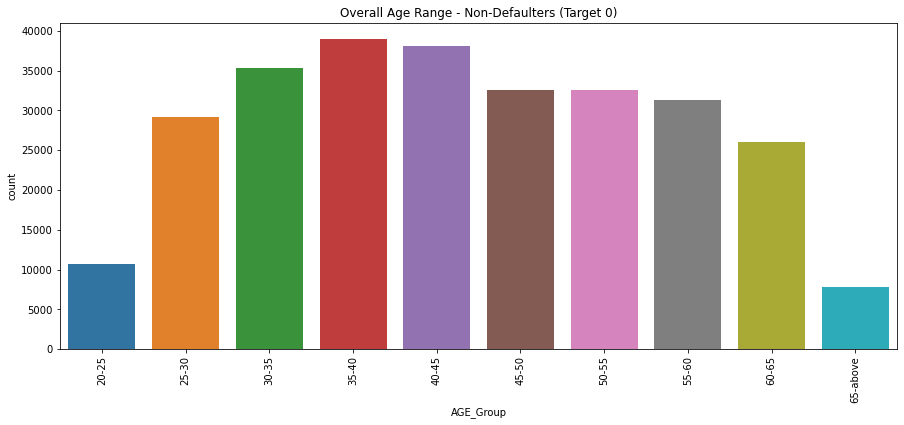

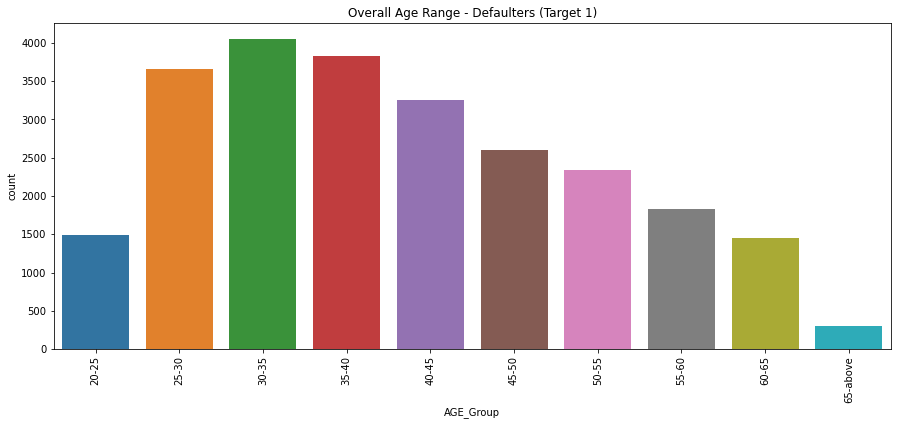

In [58]:
# Identifing data distribution for AGE_Group column.

plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
plt.title("Overall Age Range - Non-Defaulters (Target 0)")
sns.countplot(data = target0, x='AGE_Group')
plt.show()
plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
plt.title("Overall Age Range - Defaulters (Target 1)")
sns.countplot(data = target1, x='AGE_Group')
plt.show()

- #### Compare to other age gorup, there is a high chance of defaulters to lie under the age group of 30 to 35.
- #### Loan repayment rate is comparatively higher for age group 35 to 45.

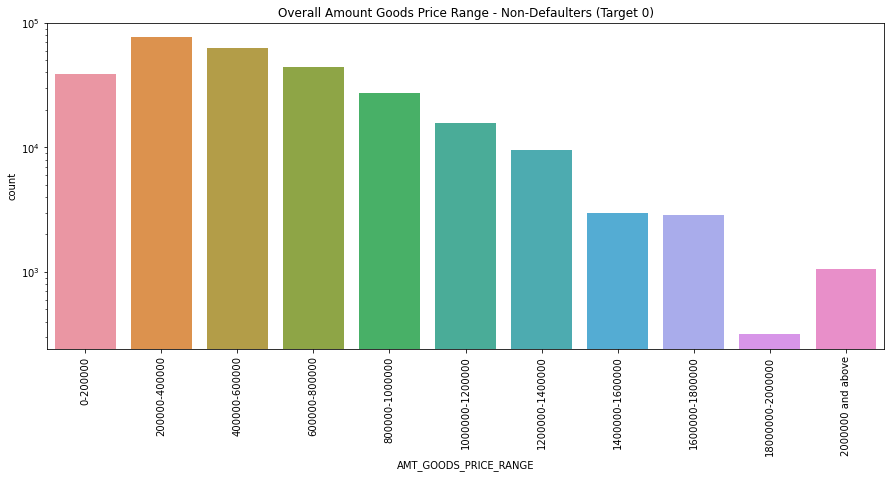

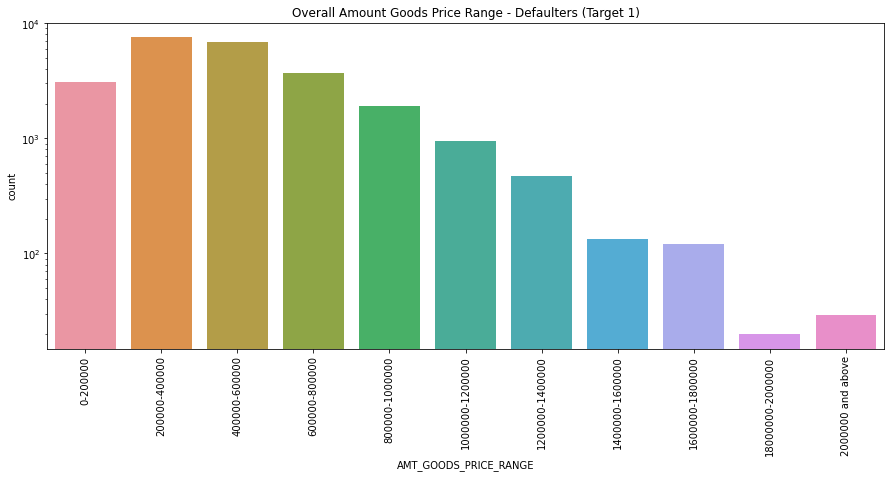

In [59]:
# Identifing data distribution for AMT_GOODS_PRICE_RANGE column.

plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Overall Amount Goods Price Range - Non-Defaulters (Target 0)")
sns.countplot(data = target0, x='AMT_GOODS_PRICE_RANGE' )
plt.show()
plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Overall Amount Goods Price Range - Defaulters (Target 1)")
sns.countplot(data = target1, x='AMT_GOODS_PRICE_RANGE' )
plt.show()

- #### We see a same trend for both defaulters and non-defaulter which mainly lies between 2 lakhs to 6lakh.

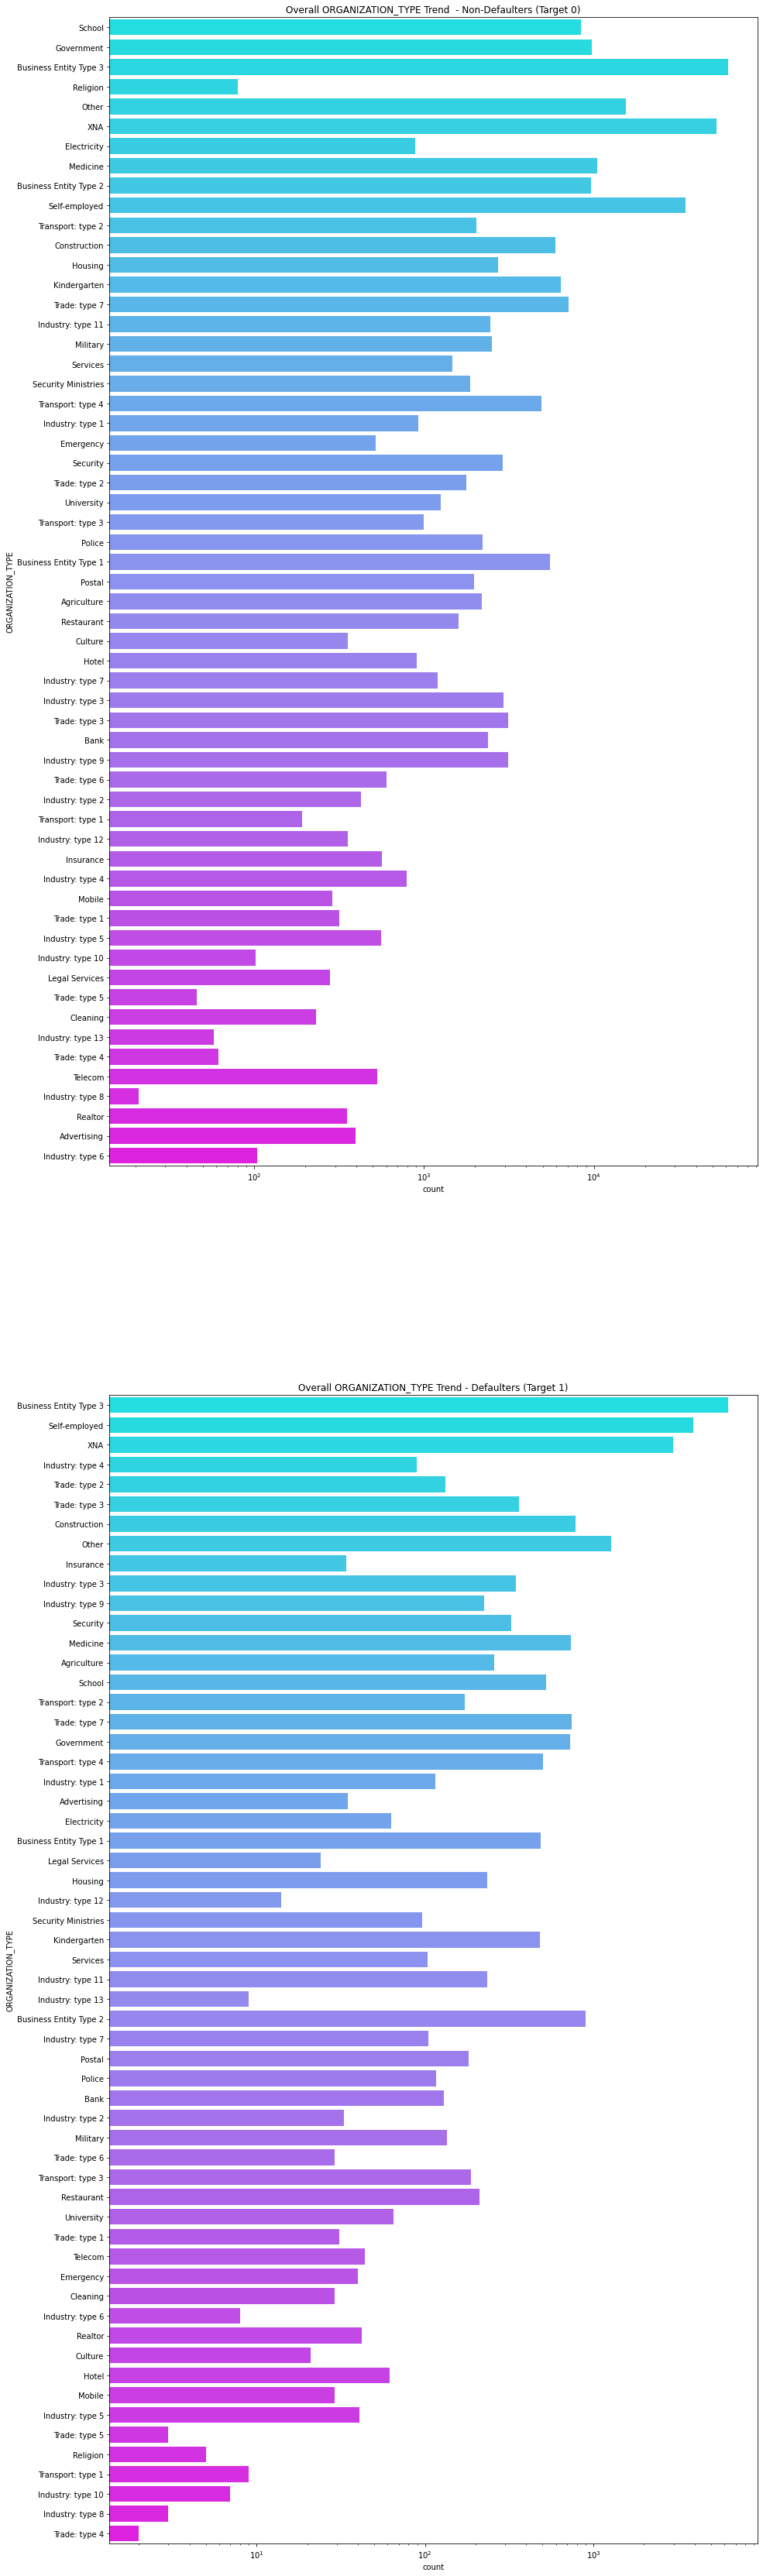

In [60]:
# Identifing data distribution for ORGANIZATION_TYPE column.

plt.figure(figsize=[15,60])
plt.subplot(2,1,1)
plt.xscale('log')
plt.title("Overall ORGANIZATION_TYPE Trend  - Non-Defaulters (Target 0)")
sns.countplot(data=target0,y='ORGANIZATION_TYPE',palette='cool')
plt.subplot(2,1,2)
plt.xscale('log')
plt.title("Overall ORGANIZATION_TYPE Trend - Defaulters (Target 1)")
sns.countplot(data=target1,y='ORGANIZATION_TYPE',palette='cool')
plt.show()

- #### We see that a large number of applicants who belongs to Organization type of 'Business Entity Type 3', 'Self-Employed', 'Medicine' and 'Government Entity Type 2'.

#### Bivariant Data Analysis

In [61]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Flag_Contacts,age,income,bin_income,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_Group
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,-1134.0,4,25.920548,2.025,"(0.0, 50.0]",300000-600000,20000-40000,200000-400000,25-30
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,0,0,0,School,-828.0,4,45.931507,2.700,"(0.0, 50.0]",1200000-1500000,20000-40000,1000000-1200000,45-50
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,-815.0,5,52.180822,0.675,"(0.0, 50.0]",0-300000,0-20000,0-200000,50-55
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,-617.0,3,52.068493,1.350,"(0.0, 50.0]",300000-600000,20000-40000,200000-400000,50-55
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,-1106.0,3,54.608219,1.215,"(0.0, 50.0]",300000-600000,20000-40000,400000-600000,50-55


In [62]:
# printing numb=erical columns
application.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'Flag_Contacts', 'age', 'income'],
      dtype='object')

In [63]:
# Converting below columns values to numeric.

numeric_columns=['TARGET', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'Flag_Contacts', 'age', 'income']

target0[numeric_columns] = target0[numeric_columns].apply(pd.to_numeric)
target1[numeric_columns] = target1[numeric_columns].apply(pd.to_numeric)


In [64]:
# Finding correlation based on Target 0 and Target 1
 
target0_corr = target1.iloc[0:,2:]
target1_corr = target1.iloc[0:,2:]

target0_final = target0_corr.corr(method='spearman')
target1_final = target1_corr.corr(method='spearman')

In [65]:
target0_final

,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,Flag_Contacts,age,income
CNT_CHILDREN,1.000000,0.000200,0.033679,-0.007572,-0.031628,-0.116332,0.133658,-0.027320,0.823307,0.041631,0.043367,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352,0.012812,0.097194,-0.267862,-0.004749
AMT_CREDIT,0.000200,1.000000,0.811443,0.977224,0.039919,-0.083601,-0.017099,-0.053780,0.067447,-0.047654,-0.059218,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182,-0.098580,-0.030201,0.155216,0.359276
AMT_ANNUITY,0.033679,0.811443,1.000000,0.804931,0.023297,-0.096587,0.035900,-0.014472,0.088604,-0.057905,-0.072974,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922,-0.074302,0.025013,0.030483,0.431617
AMT_GOODS_PRICE,-0.007572,0.977224,0.804931,1.000000,0.054140,-0.086194,-0.019172,-0.059736,0.064627,-0.056462,-0.067315,0.016977,0.033732,0.034991,-0.030182,-0.032558,-0.012560,-0.110547,-0.009188,0.157778,0.362780
REGION_POPULATION_RELATIVE,-0.031628,0.039919,0.023297,0.054140,1.000000,-0.003635,-0.034315,-0.023668,-0.022721,-0.333042,-0.347461,-0.032472,-0.009009,0.010621,-0.057083,-0.044331,-0.016447,-0.041326,0.015881,0.046398,0.051463
DAYS_EMPLOYED,-0.116332,-0.083601,-0.096587,-0.086194,-0.003635,1.000000,-0.017716,-0.049799,-0.144711,-0.000563,-0.001435,0.037032,0.016830,0.002150,0.046567,-0.025656,-0.055327,0.145979,-0.314941,0.107174,-0.117761
DAYS_REGISTRATION,0.133658,-0.017099,0.035900,-0.019172,-0.034315,-0.017716,1.000000,0.095750,0.126736,0.096914,0.093518,0.015237,0.014323,0.010359,0.033891,0.071324,0.052747,0.057693,0.047696,-0.232940,0.036671
DAYS_ID_PUBLISH,-0.027320,-0.053780,-0.014472,-0.059736,-0.023668,-0.049799,0.095750,1.000000,-0.029132,0.002648,-0.000248,0.032654,0.032845,0.019967,0.068605,0.070867,0.031407,0.102175,0.092721,-0.251626,-0.005929
CNT_FAM_MEMBERS,0.823307,0.067447,0.088604,0.064627,-0.022721,-0.144711,0.126736,-0.029132,1.000000,0.042534,0.046526,-0.027244,-0.026123,-0.015591,-0.003933,0.044079,0.059079,-0.020155,0.106218,-0.172208,0.003867
REGION_RATING_CLIENT,0.041631,-0.047654,-0.057905,-0.056462,-0.333042,-0.000563,0.096914,0.002648,0.042534,1.000000,0.956080,-0.030669,-0.104515,-0.110165,0.040882,0.006682,-0.023991,0.005002,-0.032511,-0.035383,-0.157085


In [66]:
# Taking only relevant columns from target0_corr dataset.

target0_corr = target0_final[['CNT_CHILDREN','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                           'REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION',
                           'DAYS_ID_PUBLISH','LIVE_REGION_NOT_WORK_REGION',
                           'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','income']]
target0_final = target0_corr.corr(method='spearman')
target0_final

,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,income
CNT_CHILDREN,1.000000,-0.151948,0.084416,-0.142857,-0.448052,-0.566234,0.784416,0.223377,-0.101299,0.046753,0.359740,0.525974,-0.171429
AMT_CREDIT,-0.151948,1.000000,0.905195,0.985714,0.718182,-0.412987,-0.454545,-0.612987,0.246753,-0.667532,-0.366234,-0.084416,0.796104
AMT_ANNUITY,0.084416,0.905195,1.000000,0.910390,0.585714,-0.562338,-0.197403,-0.389610,0.367532,-0.494805,-0.161039,0.177922,0.827273
AMT_GOODS_PRICE,-0.142857,0.985714,0.910390,1.000000,0.768831,-0.470130,-0.470130,-0.605195,0.264935,-0.687013,-0.385714,-0.079221,0.790909
REGION_POPULATION_RELATIVE,-0.448052,0.718182,0.585714,0.768831,1.000000,-0.311688,-0.688312,-0.553247,0.336364,-0.736364,-0.522078,-0.185714,0.640260
DAYS_EMPLOYED,-0.566234,-0.412987,-0.562338,-0.470130,-0.311688,1.000000,-0.350649,0.129870,-0.174026,0.385714,0.038961,-0.390909,-0.341558
DAYS_REGISTRATION,0.784416,-0.454545,-0.197403,-0.470130,-0.688312,-0.350649,1.000000,0.483117,-0.258442,0.355844,0.387013,0.468831,-0.440260
DAYS_ID_PUBLISH,0.223377,-0.612987,-0.389610,-0.605195,-0.553247,0.129870,0.483117,1.000000,0.314286,0.710390,0.753247,0.548052,-0.159740
LIVE_REGION_NOT_WORK_REGION,-0.101299,0.246753,0.367532,0.264935,0.336364,-0.174026,-0.258442,0.314286,1.000000,0.074026,0.516883,0.628571,0.689610
REG_CITY_NOT_LIVE_CITY,0.046753,-0.667532,-0.494805,-0.687013,-0.736364,0.385714,0.355844,0.710390,0.074026,1.000000,0.635065,0.219481,-0.316883


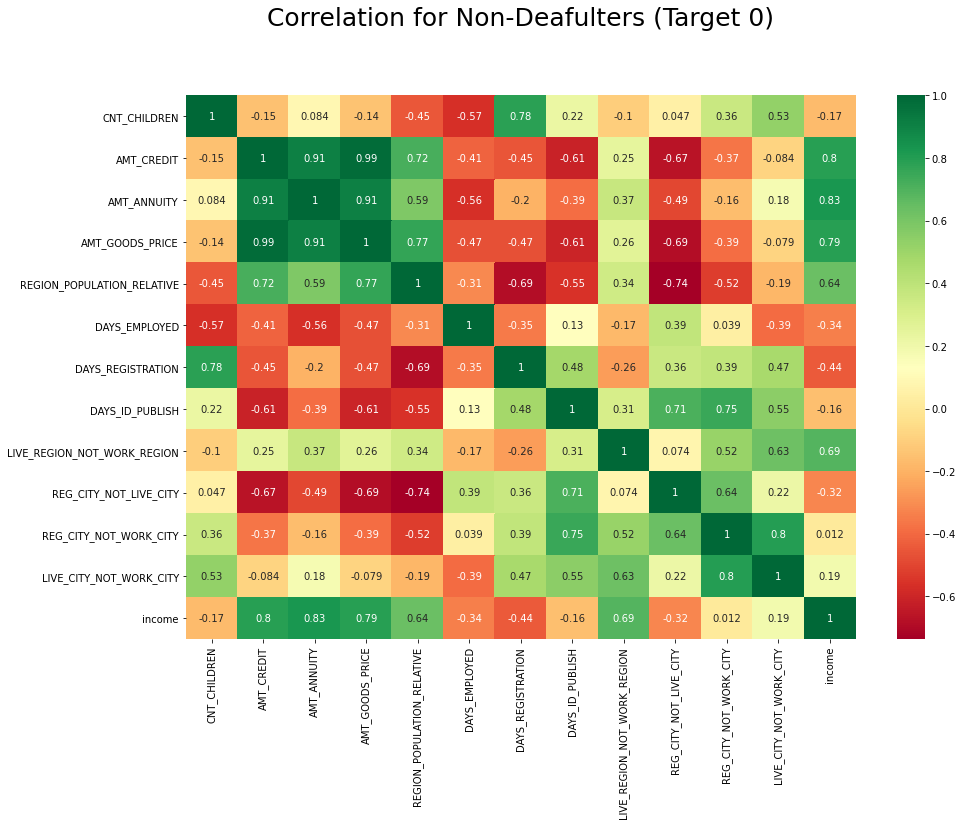

In [67]:
# Plotting Heat map for target0 dataset.

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=True)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()
    
targets_corr(data=target0_final,title='Correlation for Non-Deafulters (Target 0)')

- ###### We see that there is an inverse co-relation between the AGE(DAYS_BIRTH) VS AMT_CEDIT. 
- ###### We also see inverse co-relation between the AGE(DAYS_BIRTH) VS AMT_GOOD_PRICE.
- ###### There is high co-relation between AMT_GOODS_PRICE and AMT_CREDIT.

In [68]:
# Taking only relevant columns from target1_corr dataset.

target1_corr=target1[['CNT_CHILDREN','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                           'REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION',
                           'DAYS_ID_PUBLISH','LIVE_REGION_NOT_WORK_REGION',
                           'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'income']]
target1_final=target1_corr.corr(method='spearman')
target1_final

,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,income
CNT_CHILDREN,1.000000,0.000200,0.033679,-0.007572,-0.031628,-0.116332,0.133658,-0.027320,-0.009823,0.004127,0.047486,0.051352,-0.004749
AMT_CREDIT,0.000200,1.000000,0.811443,0.977224,0.039919,-0.083601,-0.017099,-0.053780,0.032564,-0.028544,-0.029571,-0.011182,0.359276
AMT_ANNUITY,0.033679,0.811443,1.000000,0.804931,0.023297,-0.096587,0.035900,-0.014472,0.062370,-0.002849,0.007397,0.014922,0.431617
AMT_GOODS_PRICE,-0.007572,0.977224,0.804931,1.000000,0.054140,-0.086194,-0.019172,-0.059736,0.034991,-0.030182,-0.032558,-0.012560,0.362780
REGION_POPULATION_RELATIVE,-0.031628,0.039919,0.023297,0.054140,1.000000,-0.003635,-0.034315,-0.023668,0.010621,-0.057083,-0.044331,-0.016447,0.051463
DAYS_EMPLOYED,-0.116332,-0.083601,-0.096587,-0.086194,-0.003635,1.000000,-0.017716,-0.049799,0.002150,0.046567,-0.025656,-0.055327,-0.117761
DAYS_REGISTRATION,0.133658,-0.017099,0.035900,-0.019172,-0.034315,-0.017716,1.000000,0.095750,0.010359,0.033891,0.071324,0.052747,0.036671
DAYS_ID_PUBLISH,-0.027320,-0.053780,-0.014472,-0.059736,-0.023668,-0.049799,0.095750,1.000000,0.019967,0.068605,0.070867,0.031407,-0.005929
LIVE_REGION_NOT_WORK_REGION,-0.009823,0.032564,0.062370,0.034991,0.010621,0.002150,0.010359,0.019967,1.000000,-0.000011,0.181182,0.244071,0.144970
REG_CITY_NOT_LIVE_CITY,0.004127,-0.028544,-0.002849,-0.030182,-0.057083,0.046567,0.033891,0.068605,-0.000011,1.000000,0.472052,-0.010954,0.008996


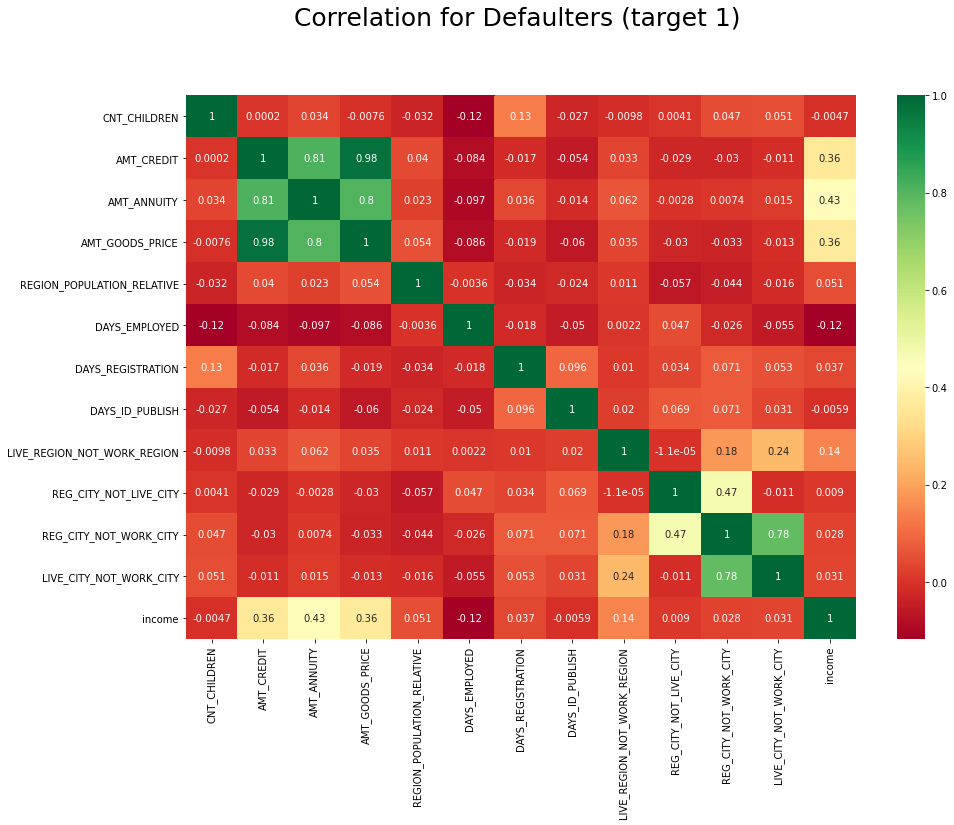

In [69]:
# Plotting Heat map for Defaulter (target1) dataset.

targets_corr(data=target1_final,title='Correlation for Defaulters (target 1) ')

###### We see a similar patter as that of Non-Defaultors (Target 0) for the above heat map in Defaultors (Target 1) .
- ###### We see that there is an inverse co-relation between the AGE(DAYS_BIRTH) VS AMT_CEDIT. 
- ###### We also see inverse co-relation between the AGE(DAYS_BIRTH) VS AMT_GOOD_PRICE.
- ###### There is high co-relation between AMT_GOODS_PRICE and AMT_CREDIT.

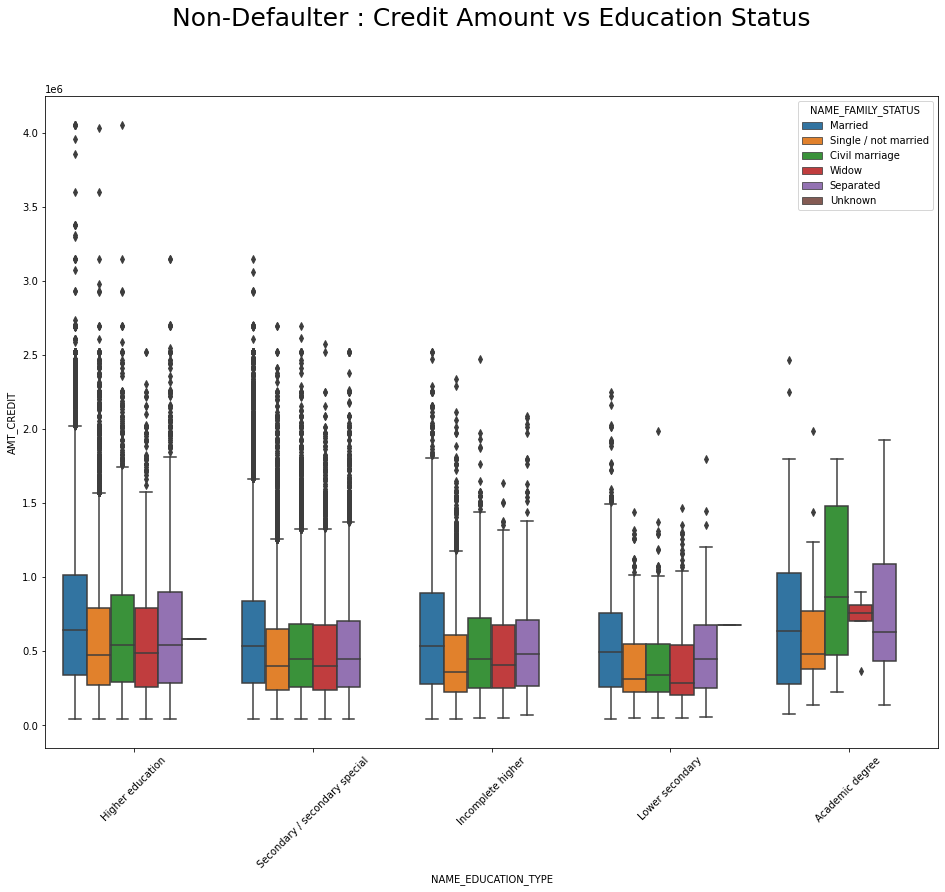

In [70]:
# Identifying pattern between 'Credit Amount & Education Status' using boxplot for Non-Defaulters (Target 0).

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Non-Defaulter : Credit Amount vs Education Status')
plt.show()

- #### We see that the Applicants with status as `Single/Unmarried` trend to ask for less Credit Amounts and lies in non-defaulters list.
- #### We see few Applicants completed `Higher Education` have asked for exceptionally huge Credit Amounts and have clean track record.
- ##### Civil marriage for Academic degree is having most of the credits in the third quartile.

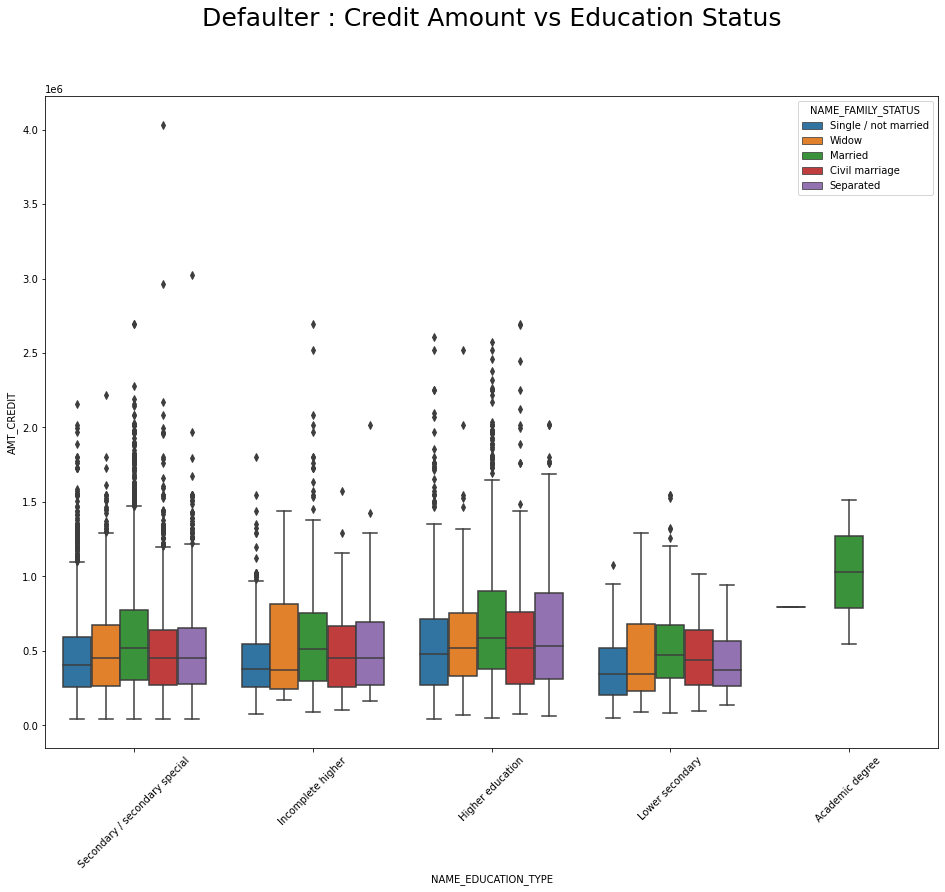

In [71]:
## Identifying pattern between 'Credit Amount & Education Status' using boxplot for Defaulters (Target 1).

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Defaulter : Credit Amount vs Education Status')
plt.show()

- #### We see that `Married` Applicants who have completed `Higher Education` are applying for more Credit Amounts than any other Education type.
- #### And Married Applicants across all Education type apply for higher Credit Amount than any other Family type `Single`, `Widow`, `Civil Marriage` or `Seperated`
- ##### See see a lot of outliers in Secondary Education type for Defaultors.

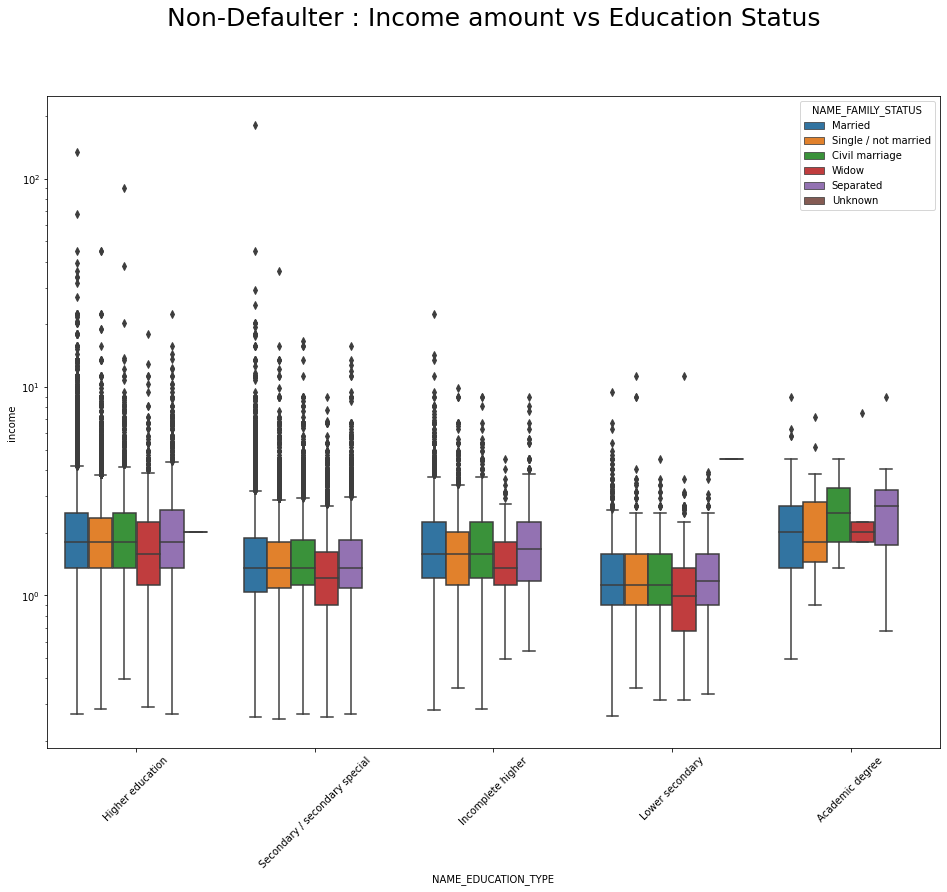

In [72]:
## Identifying pattern between 'Income amount & Education Status' using boxplot for Non-Defaulters (Target 0).

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='income', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Non-Defaulter : Income amount vs Education Status')
plt.show()

- #### We see comparatively higher income range for people who completed `Higher Education` or holding `Secondary/SecondarySpecial` Degree in Non-Defaulter list.
- #### Overall Average Income is higher for `Academic Degree` Holders.

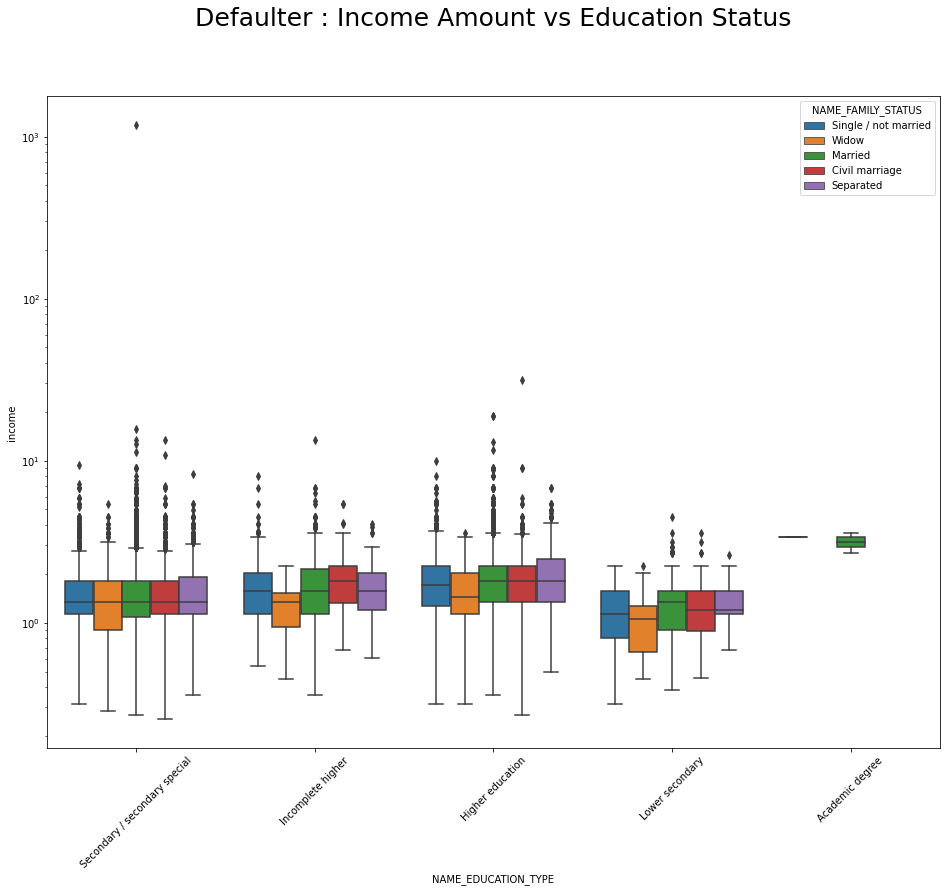

In [73]:
## Identifying pattern between 'Income Amount & Education Status' using boxplot for Defaulters (Target 1).

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='income', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Defaulter : Income Amount vs Education Status')
plt.show()

- ##### We see that there is less defaultors of people who are holding a `Academic Degree`.
- ##### We see higher income range for the Higher education sector who are Defaultors.

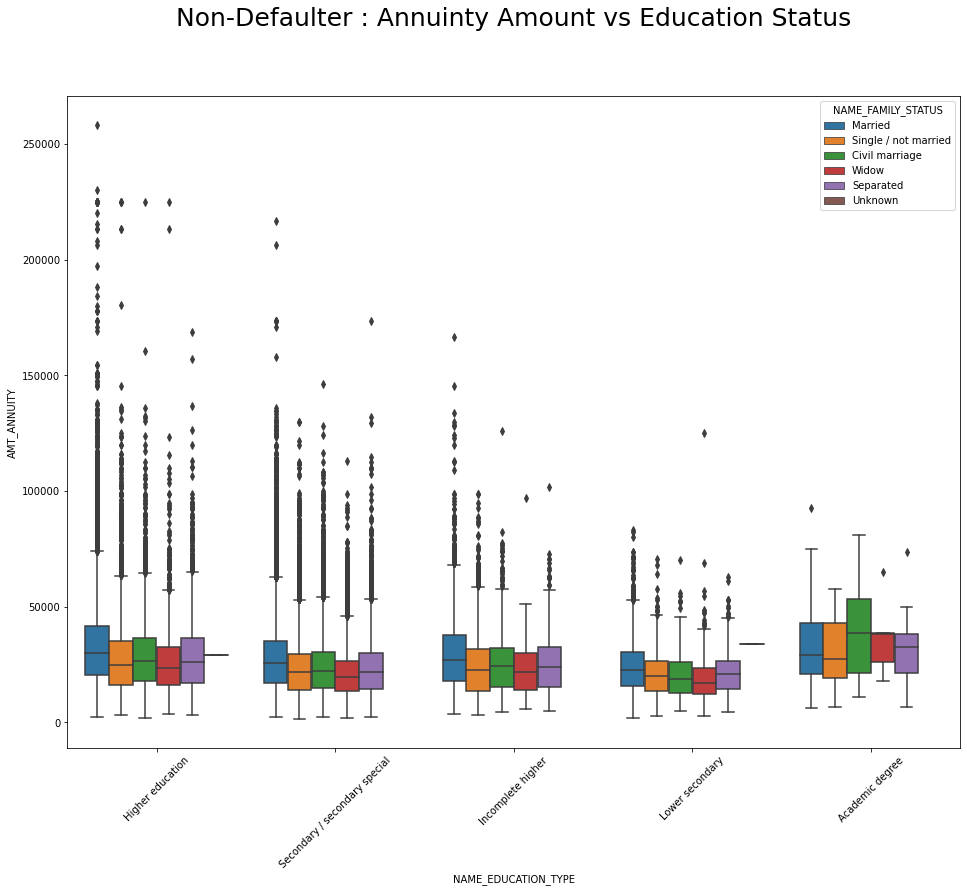

In [74]:
## Identifying pattern between 'Annuity amount & Education Status' using boxplot for Non-Defaulters (Target 0).

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Non-Defaulter : Annuinty Amount vs Education Status')
plt.show()

- #### Overall Average Annuity is higher for Academic Degree holder and are confined to a specific range compare to other Educational types.
- #### We see a huge variation in Annuity for people completed Higher Education or Secondary/SecondarySpecial Degree.

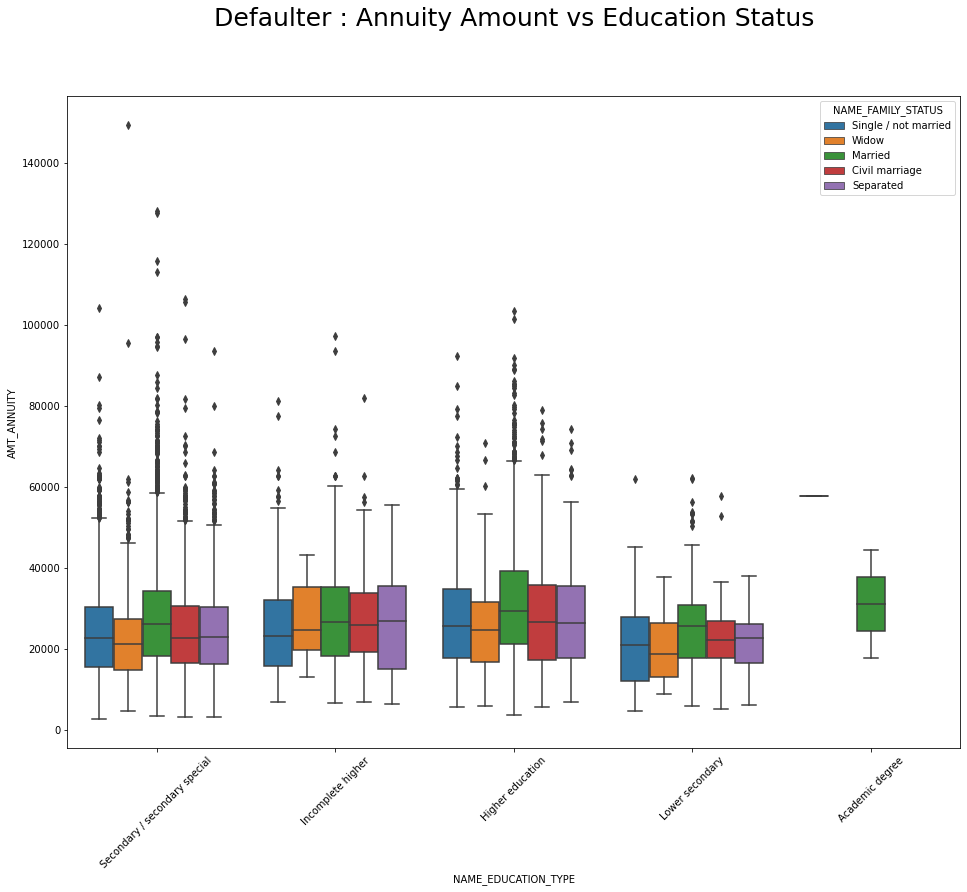

In [75]:
## Identifying pattern between 'Annuity Amount & Education Status' using boxplot for Defaulters (Target 1).

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Defaulter : Annuity Amount vs Education Status')
plt.show()

- #### We see mostly `Married` Applicant holding `Academic Degree` trend to be on defaulter side.
- #### Also `Maired` Applicants trend to have higher Annuity Amount across all Education category.

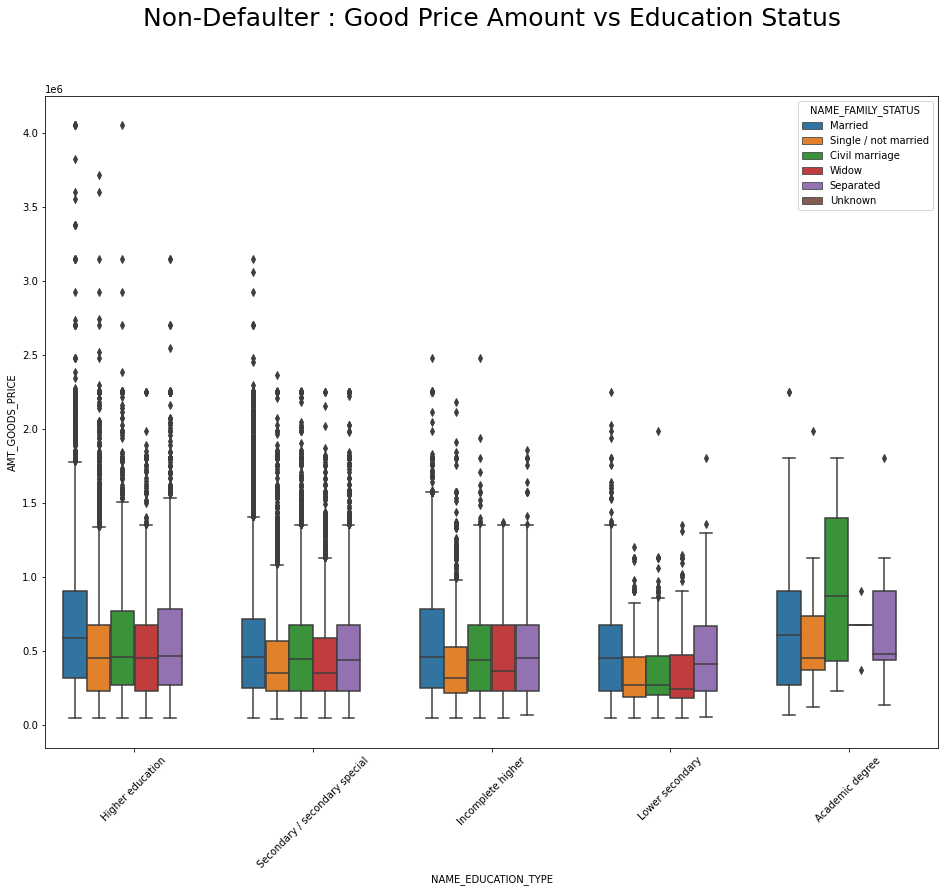

In [76]:
## Identifying pattern between 'Good price amount & Education Status' using boxplot for Non-Defaulters (Target 0).

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_GOODS_PRICE', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Non-Defaulter : Good Price Amount vs Education Status')
plt.show()

- #### We see consistant range of Goods Price for Applicant holding Academic Degree compared to other Educational Types.
- #### We also see higher Good Price Amount for Applicant completed Higher Education in Non-Defaulter list. 

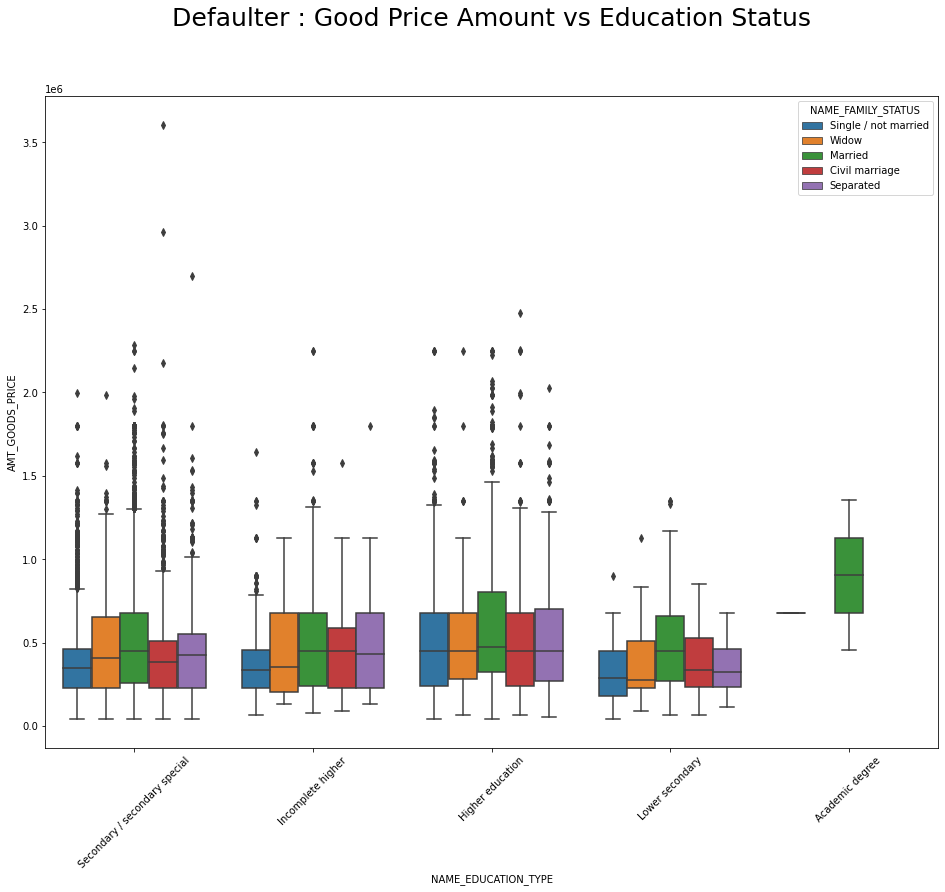

In [77]:
## Identifying pattern between 'Good price amount & Education Status' using boxplot for Defaulters (Target 1).

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)

sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_GOODS_PRICE', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Defaulter : Good Price Amount vs Education Status')
plt.show()

- #### We see that `Married` Applicant holding `Academic Degree` trend to have higher Goods Prices Amount.
- #### Also `Widow` Applicants who have studied only till `Lower Secondary` having least Goods Price Amount.

### 7. Previous Application Dataset

#### Reading Dataset

In [78]:
# Reading pre_application Dataset

pre_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


####  Dataset Inspection & Validation

In [79]:
print("List of Columns in Previous_Application_data :")
print(pre_application.columns,end="\n\n")
print('---------------------------------------------------------------------------------------------------')
print("Shape of Previous_Application_data :",end='')
print(pre_application.shape,end="\n\n")
print("Rows in the dataset:",end='')
print(pre_application.shape[0],end="\n\n")
print("Columns in the dataset:",end='')
print(pre_application.shape[1],end="\n\n")
print('---------------------------------------------------------------------------------------------------')
print("Variable type of the Previous_Application_data :")
print(pre_application.dtypes)

List of Columns in Previous_Application_data :
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

-------------------------------------------------

####  Data Cleansing

In [80]:
# Checking the columns with Null percentage greater than 30%.

missing_col=pre_application.columns[100*(pre_application.isnull().sum(axis=0)/len(pre_application.index)) >= 30]
missing_col=list(missing_col)
len(missing_col)

11

#### The above columns are having NULL percentage greater than 30% and these columns are not required for the further analysis.

##### Deleting the coulmns which is having Null percentage greater than 30% from the list created above.

In [81]:
pre_application.drop(missing_col,axis=1,inplace=True)
round(100*(pre_application.isnull().sum(axis=0)/len(pre_application.index)),2)


SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

In [82]:
pre_application.shape

(1670214, 26)

In [83]:
## Dropping Rows having Junk values.

pre_application=pre_application.drop(pre_application[pre_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_application=pre_application.drop(pre_application[pre_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_application=pre_application.drop(pre_application[pre_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

pre_application.shape

(69635, 26)

#### Mearging of Current & Previous Application Dataset.

In [84]:
# Merged Previous and current Applicants Dataset using column 'SK_ID_CURR'

Combined_dataset=pd.merge(left=application,right=pre_application,how='inner',on='SK_ID_CURR',suffixes='_1')

In [85]:
# Renaming the suffixed column names with appropriate values in Derived dataset(new_data_set)

Combined_dataset = Combined_dataset.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE1':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDIT1':'AMT_CREDIT_PREV','AMT_ANNUITY1':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_START1':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START1':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [86]:
Combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   59413 non-null  int64   
 1   TARGET                       59413 non-null  int64   
 2   NAME_CONTRACT_TYPE           59413 non-null  object  
 3   CODE_GENDER                  59413 non-null  object  
 4   FLAG_OWN_CAR                 59413 non-null  object  
 5   FLAG_OWN_REALTY              59413 non-null  object  
 6   CNT_CHILDREN                 59413 non-null  int64   
 7   AMT_CREDIT                   59413 non-null  float64 
 8   AMT_ANNUITY                  59406 non-null  float64 
 9   AMT_GOODS_PRICE_             59354 non-null  float64 
 10  NAME_TYPE_SUITE              59218 non-null  object  
 11  NAME_INCOME_TYPE             59413 non-null  object  
 12  NAME_EDUCATION_TYPE          59413 non-null  object  
 13  N

In [87]:
# Removing unwanted columns for better analysis.

Combined_dataset.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

#### Data Analysis on Derived Dataset

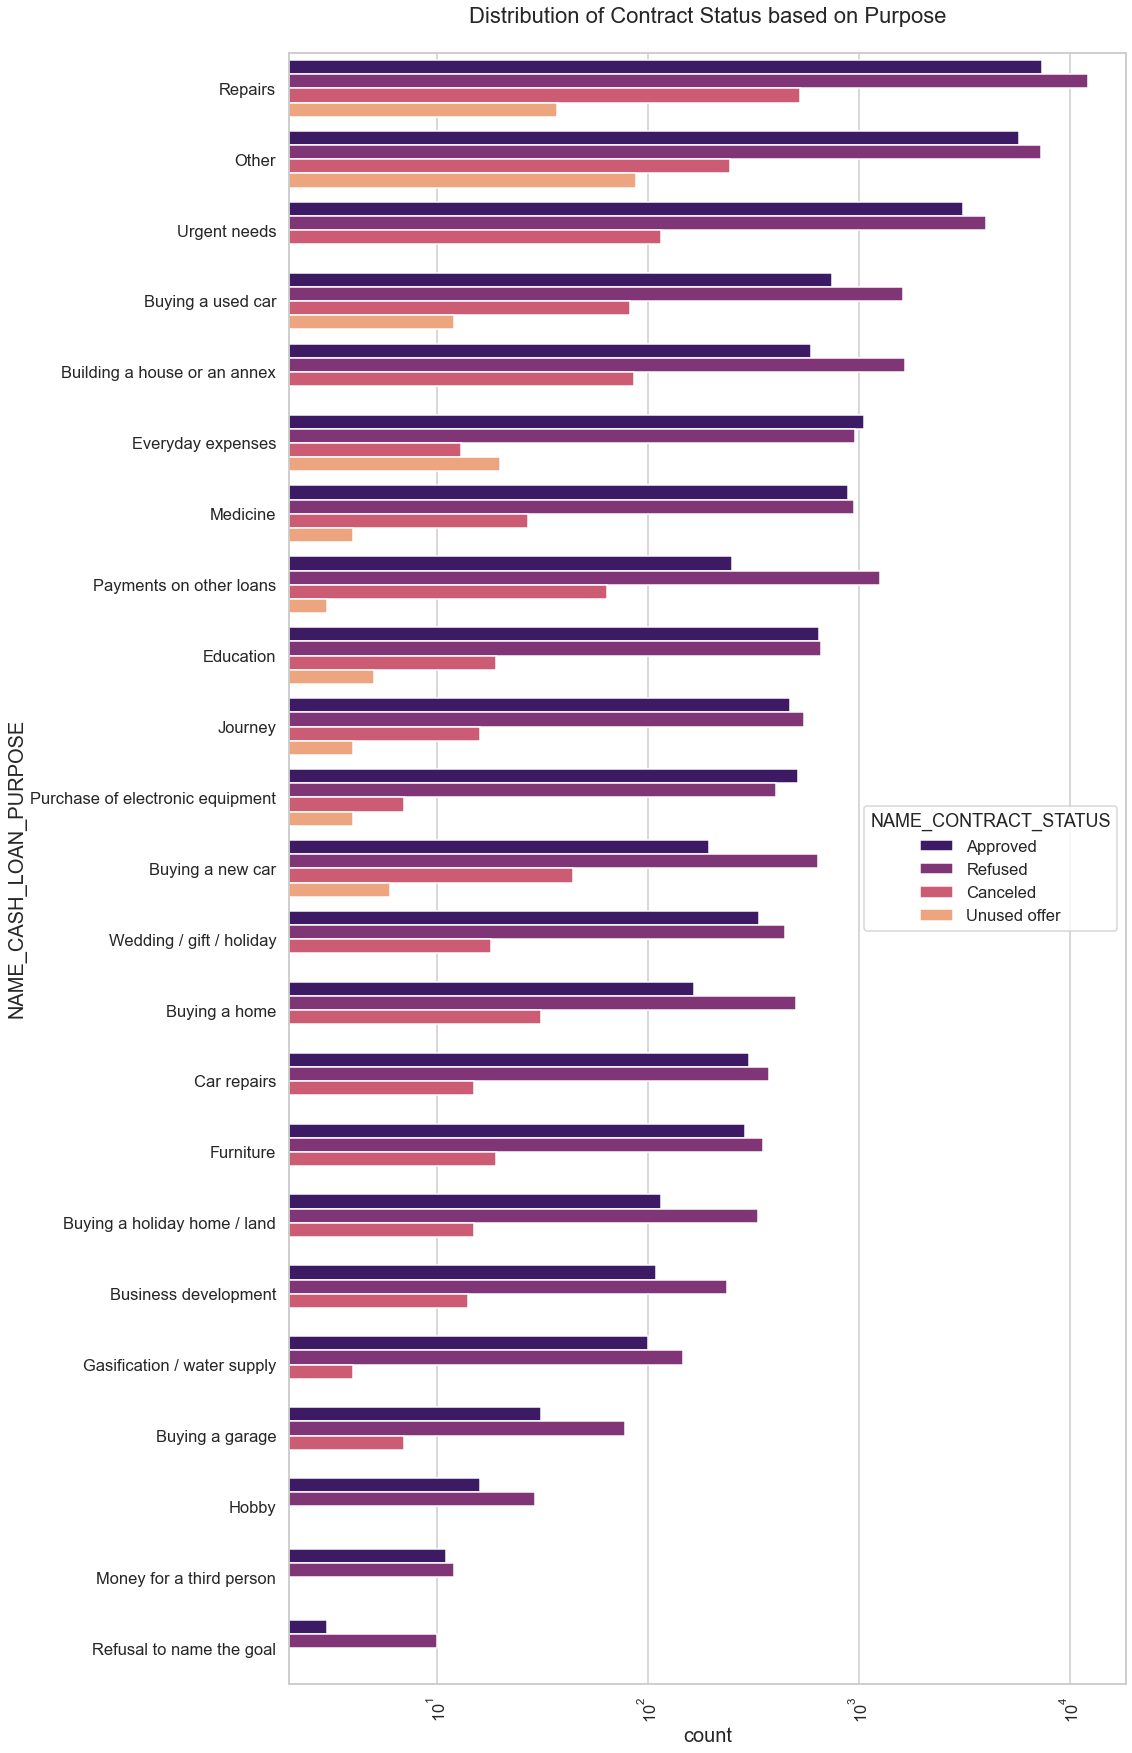

In [88]:
# Distribution of 'contract status' based on 'Purpose'.

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Contract Status based on Purpose')
ax = sns.countplot(data = Combined_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=Combined_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                   hue = 'NAME_CONTRACT_STATUS',palette='magma') 

- ##### Loan purposes with 'Repairs' are facing more difficulites in payment on time.
- ##### There are few places where loan payment is significant higher than facing difficulties.
- ##### They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'

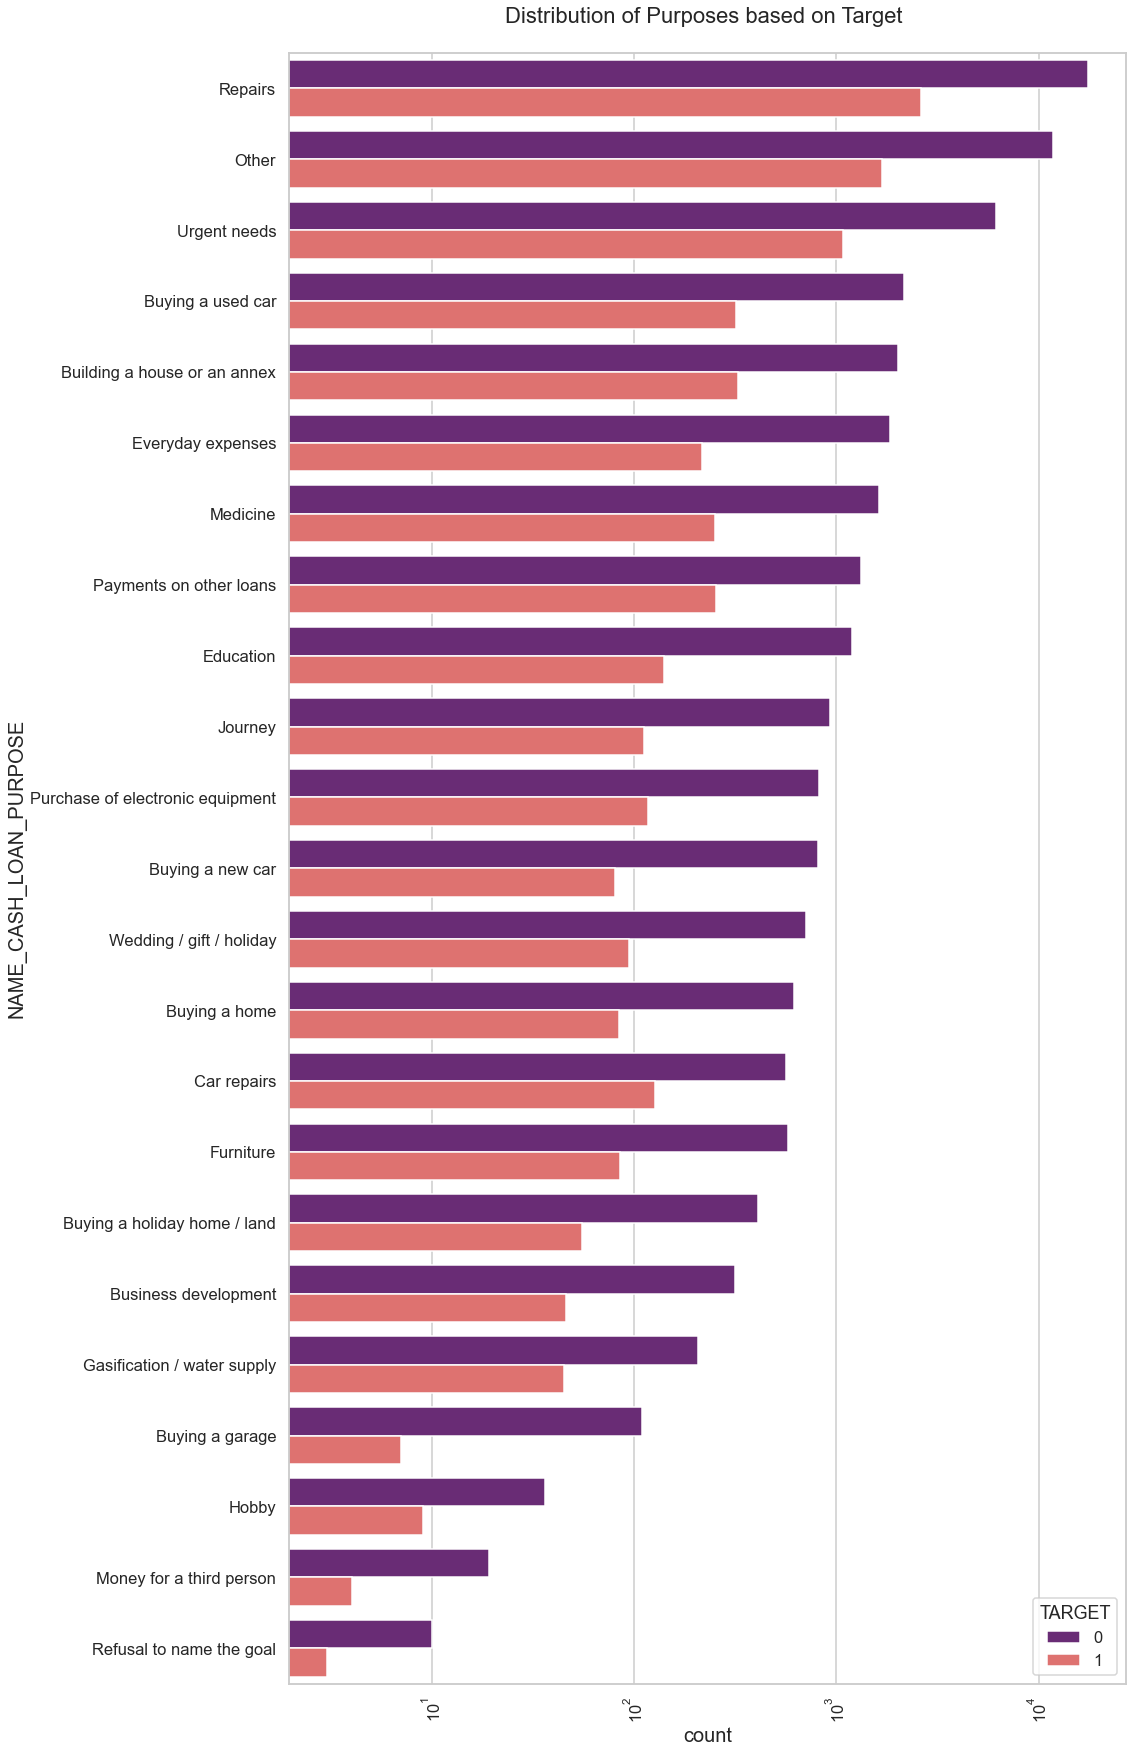

In [89]:
# Distribution of 'Contract Status' based on 'Target'.

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Purposes based on Target ')
ax = sns.countplot(data = Combined_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=Combined_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

- ##### Most rejection of loans came from purpose `repairs`.
- ##### For education purposes we have equal number of approves and rejection
- ##### Payign other mloans and buying a new car is having significant higher rejection than approves.

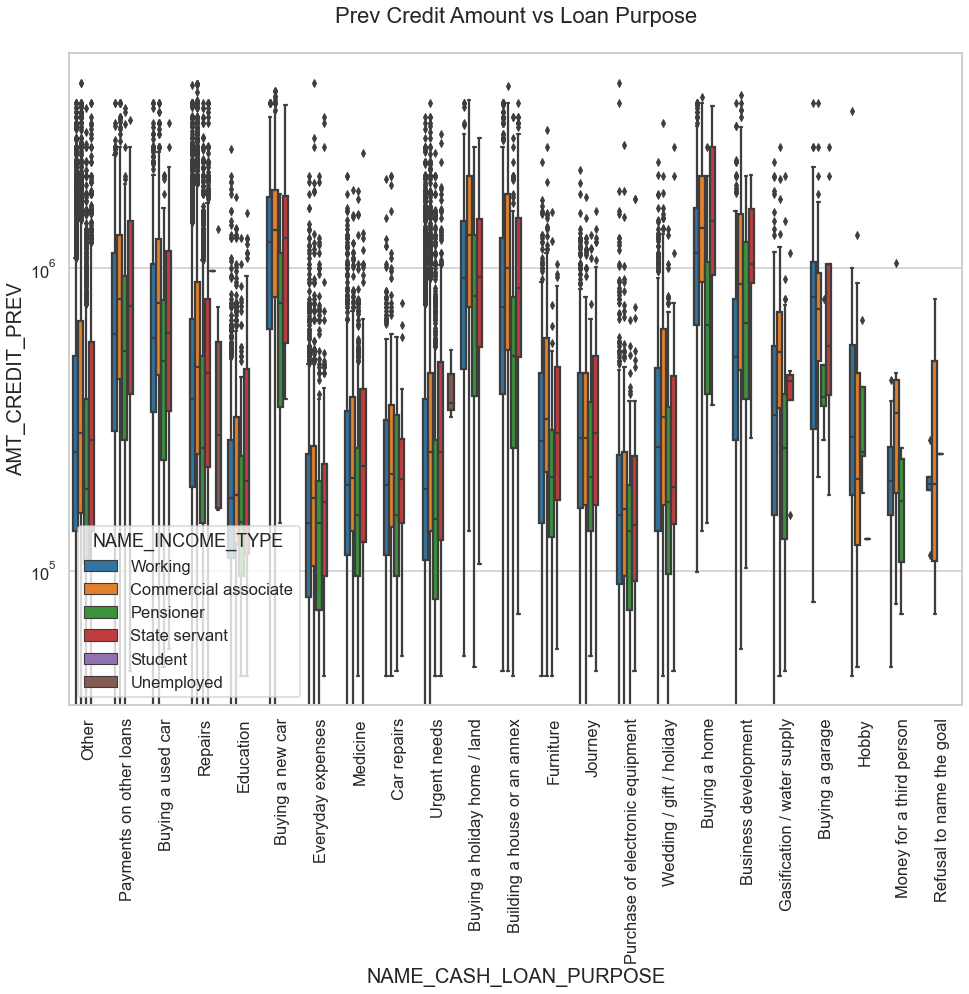

In [90]:
# Distribution of 'Previous Credit Amount' vs 'Loan Purpose'.

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =Combined_dataset, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit Amount vs Loan Purpose')
plt.show()

- #### Loan purposes with 'Repairs' are facing more difficulites in payment on time.
- #### There are few places where loan payment is significant higher than facing difficulties.
- #### They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'

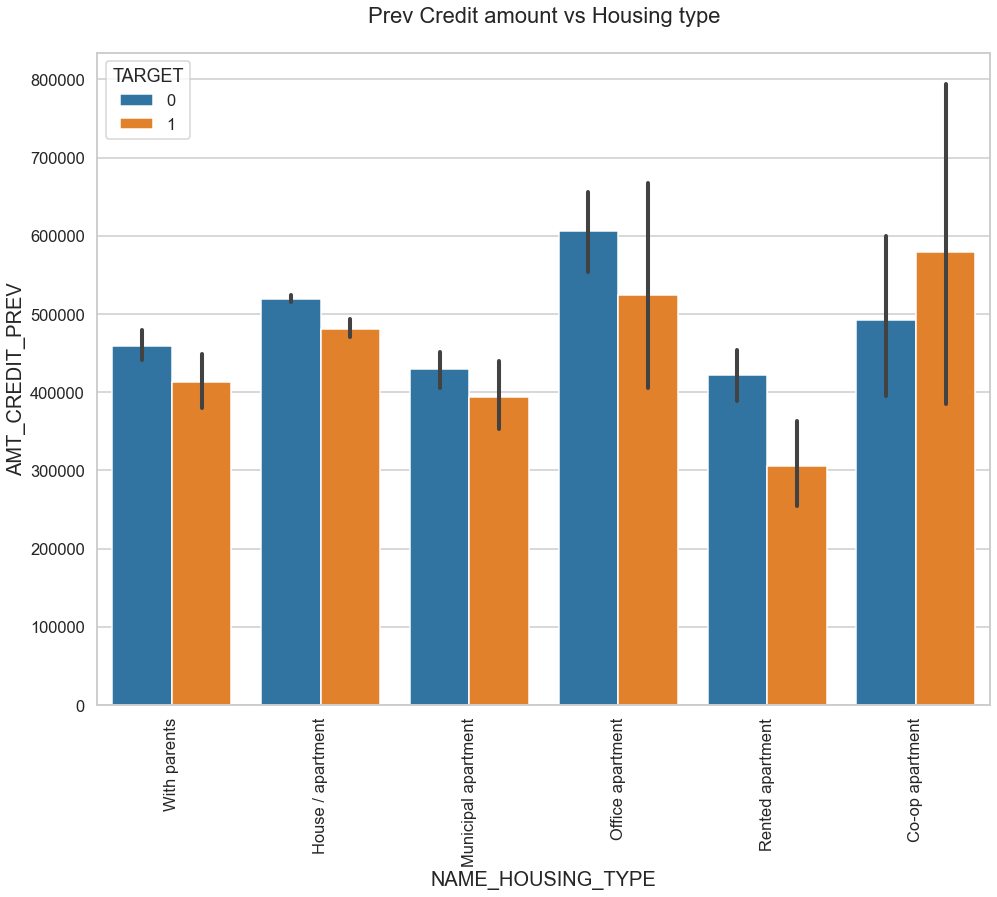

In [91]:
# Distribution of 'Previous Credit Amount' vs 'Housing Type'.

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =Combined_dataset, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

- ##### Here we see that we have more credit of Co-op apartment is more for defaulters (Target 1). Its not safe to give loans to these sectors.
- ##### It is safe to give loans for the People who leave with there parents and leaving in House/Apartment.
- ##### We See that there is high tensency for Non- Defaultors  (target 1) for Office Appartment.

### 8. Conclusion

- #### It is safe to give loan to Applicants who are holding `Higher Degrees`or holding `Academic Degree`.
- #### Among `Academic Degree` holders people having Family status other then `Married` are the most safest category to give loan.
- #### It is very unsafe to give loan to `Widow` Applicants who have studied only till `Lower Secondary`.
- #### Loan purposes with `Repairs` are facing more difficulites in payment on time.
- #### Its not safe to give loans to people living in Co-op apartment.
- #### It is safe to give loan to the people living with there pairents as there is very less chance of Defualts.
- #### Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for higher rate of successful payments.